🚗 Complete Description of the Used Cars Dataset

This dataset contains information about 301 used cars, and the main goal is to predict the selling price of a car based on its technical features and characteristics.

Each row represents one car, and each column provides a different attribute or specification of that car.

⸻

🔹 Column Descriptions:
 • Car_Name: The name or model of the car (e.g., city, ritz). This is mostly for display purposes and is usually not used in modeling because it’s textual and often unique.
 • Year: The year the car was bought or manufactured. Instead of using this directly, it’s better to convert it to the age of the car using a formula like:

Car_Age = 2025 - Year


 • Selling_Price: The price at which the car is being sold. This is your target variable — the thing you want your machine learning model to predict.
 • Present_Price: The current ex-showroom price of the car if it were brand new.
 • Kms_Driven: The number of kilometers the car has been driven — basically, how much it has been used.
 • Fuel_Type: Type of fuel the car uses — like Petrol, Diesel, or CNG.
 • Seller_Type: Whether the seller is an individual person or a dealer.
 • Transmission: Type of transmission — Manual or Automatic.
 • Owner: Number of previous owners the car has had. A value of 0 means the car is first-hand.

⸻




⸻


In [719]:
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import chardet
import csv
import itertools
import math

Read Dataset

In [720]:
data = pd.read_csv("cardata.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [721]:
df=pd.DataFrame(data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [722]:
df.insert(0, "Age", df["Year"].max()+1-df["Year"] )
df.drop('Year', axis=1, inplace=True)
df.head()

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0


Year" shows the car model year. We can replace this column with the cars age attribute.To calculate the age, we consider the origin time to be 1 year older than the maximum model year

Dataset Overview

In [723]:
df.describe(include="all")

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,NaN,98,NaN,NaN,NaN,3,2,2,NaN
top,NaN,city,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,NaN,26,NaN,NaN,NaN,239,195,261,NaN
mean,5.372093,NaN,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,2.891554,NaN,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,1.000000,NaN,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,3.000000,NaN,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,5.000000,NaN,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,7.000000,NaN,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


1. Car_Name: Car name (text)
2. Year: Year of manufacture of the car (numeric) 
3. Selling_Price: Selling price of the car in million rupees (decimal) 
4. Present_Price: Current price of the car with zero km (decimal)
5. Kms_Driven: Distance travelled by the car in kilometers (numeric) 
6. Fuel_Type: Type of fuel used (petrol, diesel, CNG) (text)
7. Seller_Type: Type of seller (personal seller or dealer) (text)
8. Transmission: Transmission type (manual or automatic) (text)
9. Owner: Number of previous owners of the car (numeric)

In [724]:
df.describe(include="number")

,Age,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,5.372093,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,1.000000,0.100000,0.320000,500.000000,0.000000
25%,3.000000,0.900000,1.200000,15000.000000,0.000000
50%,5.000000,3.600000,6.400000,32000.000000,0.000000
75%,7.000000,6.000000,9.900000,48767.000000,0.000000
max,16.000000,35.000000,92.600000,500000.000000,3.000000


In [725]:
df.describe(include="object")

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [726]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            301 non-null    int64  
 1   Car_Name       301 non-null    object 
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [727]:
print(df.shape)

(301, 9)


In [728]:
with open("cardata.csv", 'rb') as f:
    result = chardet.detect(f.read())
    print(result['encoding'])

ascii


In [729]:
with open(r"cardata.csv", 'r') as f:
    
     
    dialect = csv.Sniffer().sniff(f.read(1024))
    
   
    print(f"The delimiter detected for the car dataset is: {dialect.delimiter}")
    
  
 

The delimiter detected for the car dataset is: ,


In [730]:
print(df.columns)

Index(['Age', 'Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [731]:
def describe(df):
    
    
    variables = []   # Column names
    dtypes = []    # Data types of columns
    count = []      # Total number of entries in each column
    unique = []      # Number of unique values in each column
    missing = []    # Count of missing (NaN) values in each column
    
     # Loop through each column in the DataFrame
    for item in df.columns:
        variables.append(item)    # Append column name
        dtypes.append(df[item].dtype)  # Append column data type
        count.append(len(df[item]))   
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'Variable': variables, 
        'Dtype': dtypes,
        'Count': count,
        'Unique': unique,
        'Missing value': missing
    })    
        
    return output

In [732]:
describe(df)

,Variable,Dtype,Count,Unique,Missing value
0,Age,int64,301,16,0
1,Car_Name,object,301,98,0
2,Selling_Price,float64,301,156,0
3,Present_Price,float64,301,147,0
4,Kms_Driven,int64,301,206,0
5,Fuel_Type,object,301,3,0
6,Seller_Type,object,301,2,0
7,Transmission,object,301,2,0
8,Owner,int64,301,3,0


In [733]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
percent = pd.DataFrame(missing_value_df)
percent

,column_name,percent_missing
Age,Age,0.0
Car_Name,Car_Name,0.0
Selling_Price,Selling_Price,0.0
Present_Price,Present_Price,0.0
Kms_Driven,Kms_Driven,0.0
Fuel_Type,Fuel_Type,0.0
Seller_Type,Seller_Type,0.0
Transmission,Transmission,0.0
Owner,Owner,0.0


In [734]:
# Display unique values for each column
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("-" * 40)

Unique values in 'Age':
[ 5  6  2  8  1  4  3 10  9  7 16 11 13 14 15 12]
----------------------------------------
Unique values in 'Car_Name':
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero P

Data preparation

In [735]:



print(df.nunique())

Age               16
Car_Name          98
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64


In [736]:
for column in df.columns:
    print(f"Value counts for '{column}':")
    print(df[column].value_counts())
    print("-" * 40)

Value counts for 'Age':
Age
4     61
3     50
5     38
2     35
6     33
7     23
8     19
9     15
11     7
10     6
13     4
14     4
16     2
12     2
1      1
15     1
Name: count, dtype: int64
----------------------------------------
Value counts for 'Car_Name':
Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64
----------------------------------------
Value counts for 'Selling_Price':
Selling_Price
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: count, Length: 156, dtype: int64
----------------------------------------
Value counts for 'Present_Price':
Present_Price
9.40  

In [737]:

df.isnull().sum()

Age              0
Car_Name         0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [738]:
df.drop('Car_Name', axis=1, inplace=True)

Since Car_Name contains 98 unique categories, and this number of categories is very high compared to the number of dataset samples, it is better to drop it

In [739]:
# identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# result
print("Numeric columns:")
print(numeric_cols)

print("\nCategorical columns:")
print(categorical_cols)

Numeric columns:
['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

Categorical columns:
['Fuel_Type', 'Seller_Type', 'Transmission']


In [740]:


df[numeric_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,301.0,5.372093,2.891554,1.00,3.0,5.0,7.0,16.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [741]:
print(pd.unique(data["Fuel_Type"]))
print(pd.unique(data["Seller_Type"]))
print(pd.unique(data["Transmission"]))



['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


Outlier Detection

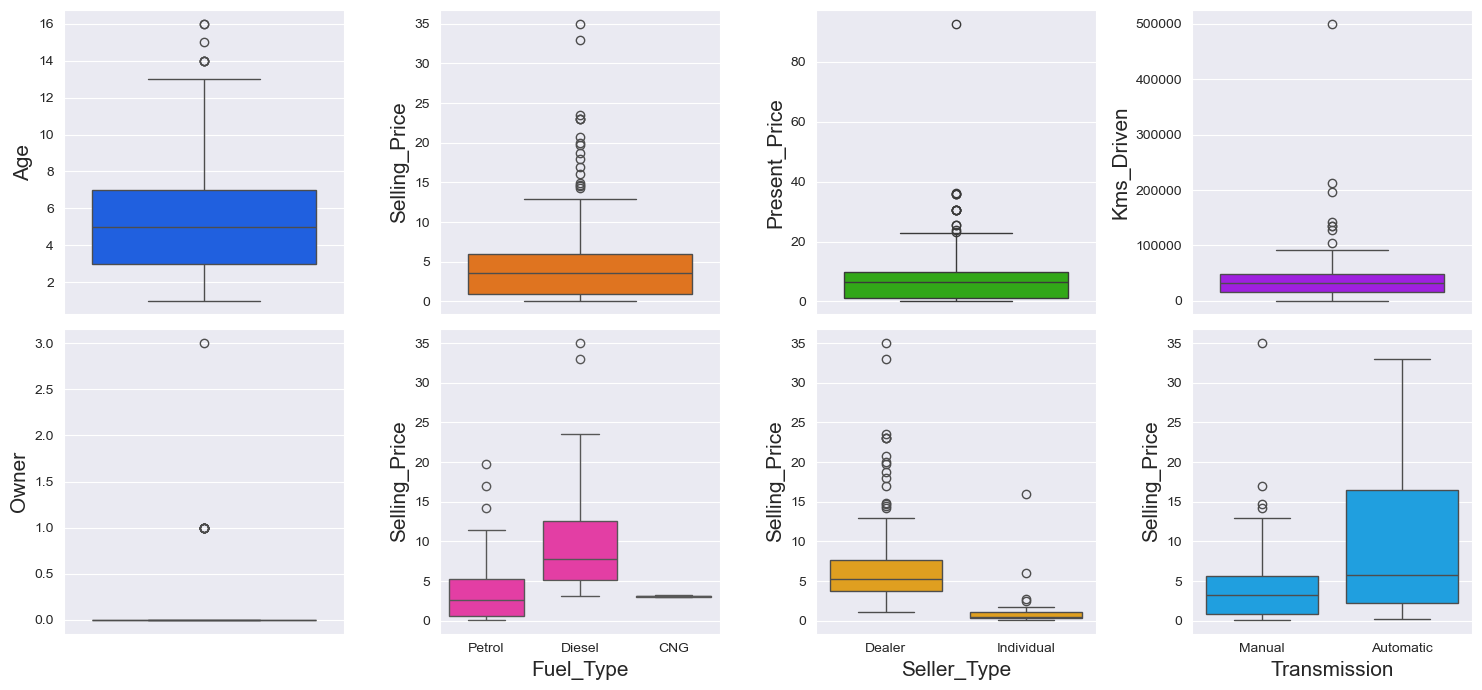

In [742]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00', '#aa00ff', '#00ffaa', '#ff22aa', '#ffaa00', '#00aaff']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values, 
                              df.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<5:
        sns.boxplot(data=df, y=col, ax=ax[x,y],color=colors[i % len(colors)])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='Selling_Price', ax=ax[x,y],color=colors[i % len(colors)])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()    
plt.show()

📊 1. Age
• As the car ages, the selling price decreases (median decreases in the boxes).
• We have a lot of dispersion and a lot of high outliers (old cars with high prices).

📌 Conclusion: Car age has a negative effect on selling price. Important.

⸻

📊 2. Owner
• Cars with the first owner (0) are usually more expensive.
• Prices drop sharply on cars with the second or third owner.

📌 Conclusion: The number of previous owners is negatively related to price.

⸻

📊 3. Fuel_Type
• Diesel and gasoline cars have a greater dispersion in price.
• CNG cars are usually lower priced and their range is much smaller.

📌 Conclusion: Fuel type has an effect on price, especially Diesel.

⸻

📊 4. Present_Price
• There is a strong direct correlation between the current market price of a car and the selling price.
• Most cars with a lower market price also have a lower selling price.

📌 Result: Very effective and important variable for regression modeling.

⸻

📊 5. Kms_Driven
• Has a lot of variation but does not have a very strong or clear effect on Selling_Price.
• There are many outliers.

📌 Result: May have less effect, unless it is proportional to the age of the car (which you did with Log_Wear_Score).

⸻

📊 6. Seller_Type
• Cars sold by Dealers usually have a higher price.
• Sales by individuals are usually cheaper.

📌 Result: Important, because the behavior of the seller affects the price.

⸻

📊 7. Transmission
• Automatic transmissions usually cost more.
• The difference is not huge, but it is noticeable.

📌 Result: Minor but noticeable effect.

In [743]:
# select numeric columns
#identify outliers
numerical_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven',"Age"] 
# calculate the upper and lower range for each numeric column.
for col in numerical_cols:
    print(f"\n--- IQR Bounds for {col} ---") 
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}") 
    print(f"IQR: {IQR}")
    print(f"Lower bound: {lower_bound}") 
    print(f"Upper bound: {upper_bound}") 
    # outliers 
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
     
    print(f"Number of outliers: {len(outliers)}")

 


--- IQR Bounds for Selling_Price ---
Q1 (25th percentile): 0.9
Q3 (75th percentile): 6.0
IQR: 5.1
Lower bound: -6.749999999999999
Upper bound: 13.649999999999999
Number of outliers: 17

--- IQR Bounds for Present_Price ---
Q1 (25th percentile): 1.2
Q3 (75th percentile): 9.9
IQR: 8.700000000000001
Lower bound: -11.850000000000001
Upper bound: 22.950000000000003
Number of outliers: 14

--- IQR Bounds for Kms_Driven ---
Q1 (25th percentile): 15000.0
Q3 (75th percentile): 48767.0
IQR: 33767.0
Lower bound: -35650.5
Upper bound: 99417.5
Number of outliers: 8

--- IQR Bounds for Age ---
Q1 (25th percentile): 3.0
Q3 (75th percentile): 7.0
IQR: 4.0
Lower bound: -3.0
Upper bound: 13.0
Number of outliers: 7


In [744]:
# list of numerical columns
numerical_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven',"Age"]
# a collection to hold indexes that are outliers on at least on column
outlier_indices = set()
# checking
for col in numerical_cols:
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1 
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR 
    outliers = df[(df[col] < lower) | (df[col] > upper)] 
    outlier_indices.update(outliers.index)
    
    num_outliers = len(outlier_indices) 
    total_rows = df.shape[0]
    percentage = (num_outliers / total_rows) * 100 
     
    print(f"Number of unique outlier rows: {num_outliers}")
    print(f"Total rows: {total_rows}")
    print(f"Percentage of outliers: {percentage:.2f}%")

Number of unique outlier rows: 17
Total rows: 301
Percentage of outliers: 5.65%
Number of unique outlier rows: 18
Total rows: 301
Percentage of outliers: 5.98%
Number of unique outlier rows: 23
Total rows: 301
Percentage of outliers: 7.64%
Number of unique outlier rows: 27
Total rows: 301
Percentage of outliers: 8.97%


In [745]:
outliers_indexes = []
target = 'Selling_Price'

for col in df.select_dtypes(include='object').columns:
    for cat in df[col].unique():
        df1 = df[df[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())
        
        
for col in df.select_dtypes(exclude='object').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = df[(df[col] < minimum) | (df[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())
    
outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

38 outliers were identified, whose indices are:

[27, 37, 39, 50, 51, 52, 53, 54, 179, 184, 58, 59, 189, 62, 63, 64, 191, 66, 192, 196, 69, 193, 198, 201, 77, 205, 79, 80, 82, 84, 85, 86, 92, 93, 96, 97, 106, 241]


It is not acceptable to drop an observation just because it is an outlier. They can be legitimate observations and it’s important to investigate the nature of the outlier before deciding whether to drop it or not. We are allowed to delete outliers in two cases:
 • Outlier is due to incorrectly entered or measured data
 • Outlier creates a significant association

These are the row numbers (indexes) in the DataFrame that have been identified as outliers.”

In [746]:
df.loc[outliers_indexes]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
27,2,6.00,6.49,16200,Petrol,Individual,Manual,0
37,16,0.35,2.28,127000,Petrol,Individual,Manual,0
39,16,2.25,7.98,62000,Petrol,Dealer,Manual,0
50,7,14.90,30.61,104707,Diesel,Dealer,Automatic,0
51,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0
52,2,18.00,19.77,15000,Diesel,Dealer,Automatic,0
53,6,16.00,30.61,135000,Diesel,Individual,Automatic,0
54,14,2.75,10.21,90000,Petrol,Individual,Manual,0
179,9,0.31,1.05,213000,Petrol,Individual,Manual,0
184,11,0.25,0.75,26000,Petrol,Individual,Manual,1


This code identifies outliers in a dataset (df) using the Interquartile Range (IQR) method for both categorical and numerical columns

It is not acceptable to drop an observation just because it is an outlier. They can be legitimate observations and it’s important to investigate the nature of the outlier before deciding whether to drop it or not. We are allowed to delete outliers in two cases:
 • Outlier is due to incorrectly entered or measured data
 • Outlier creates a significant association

In [747]:
upper_selling = df['Selling_Price'].quantile(0.999)
upper_kms = df['Kms_Driven'].quantile(0.999)
print("99th percentile of Selling_Price:", upper_selling)
print("99th percentile of Kms_Driven:", upper_kms)

99th percentile of Selling_Price: 34.40000000000009
99th percentile of Kms_Driven: 413900.00000001304


This code is checking that:
• 99.9% of cars have a selling price of less than 34.40000000000009
• 99.9% of cars have less than 413900.00000001304 km

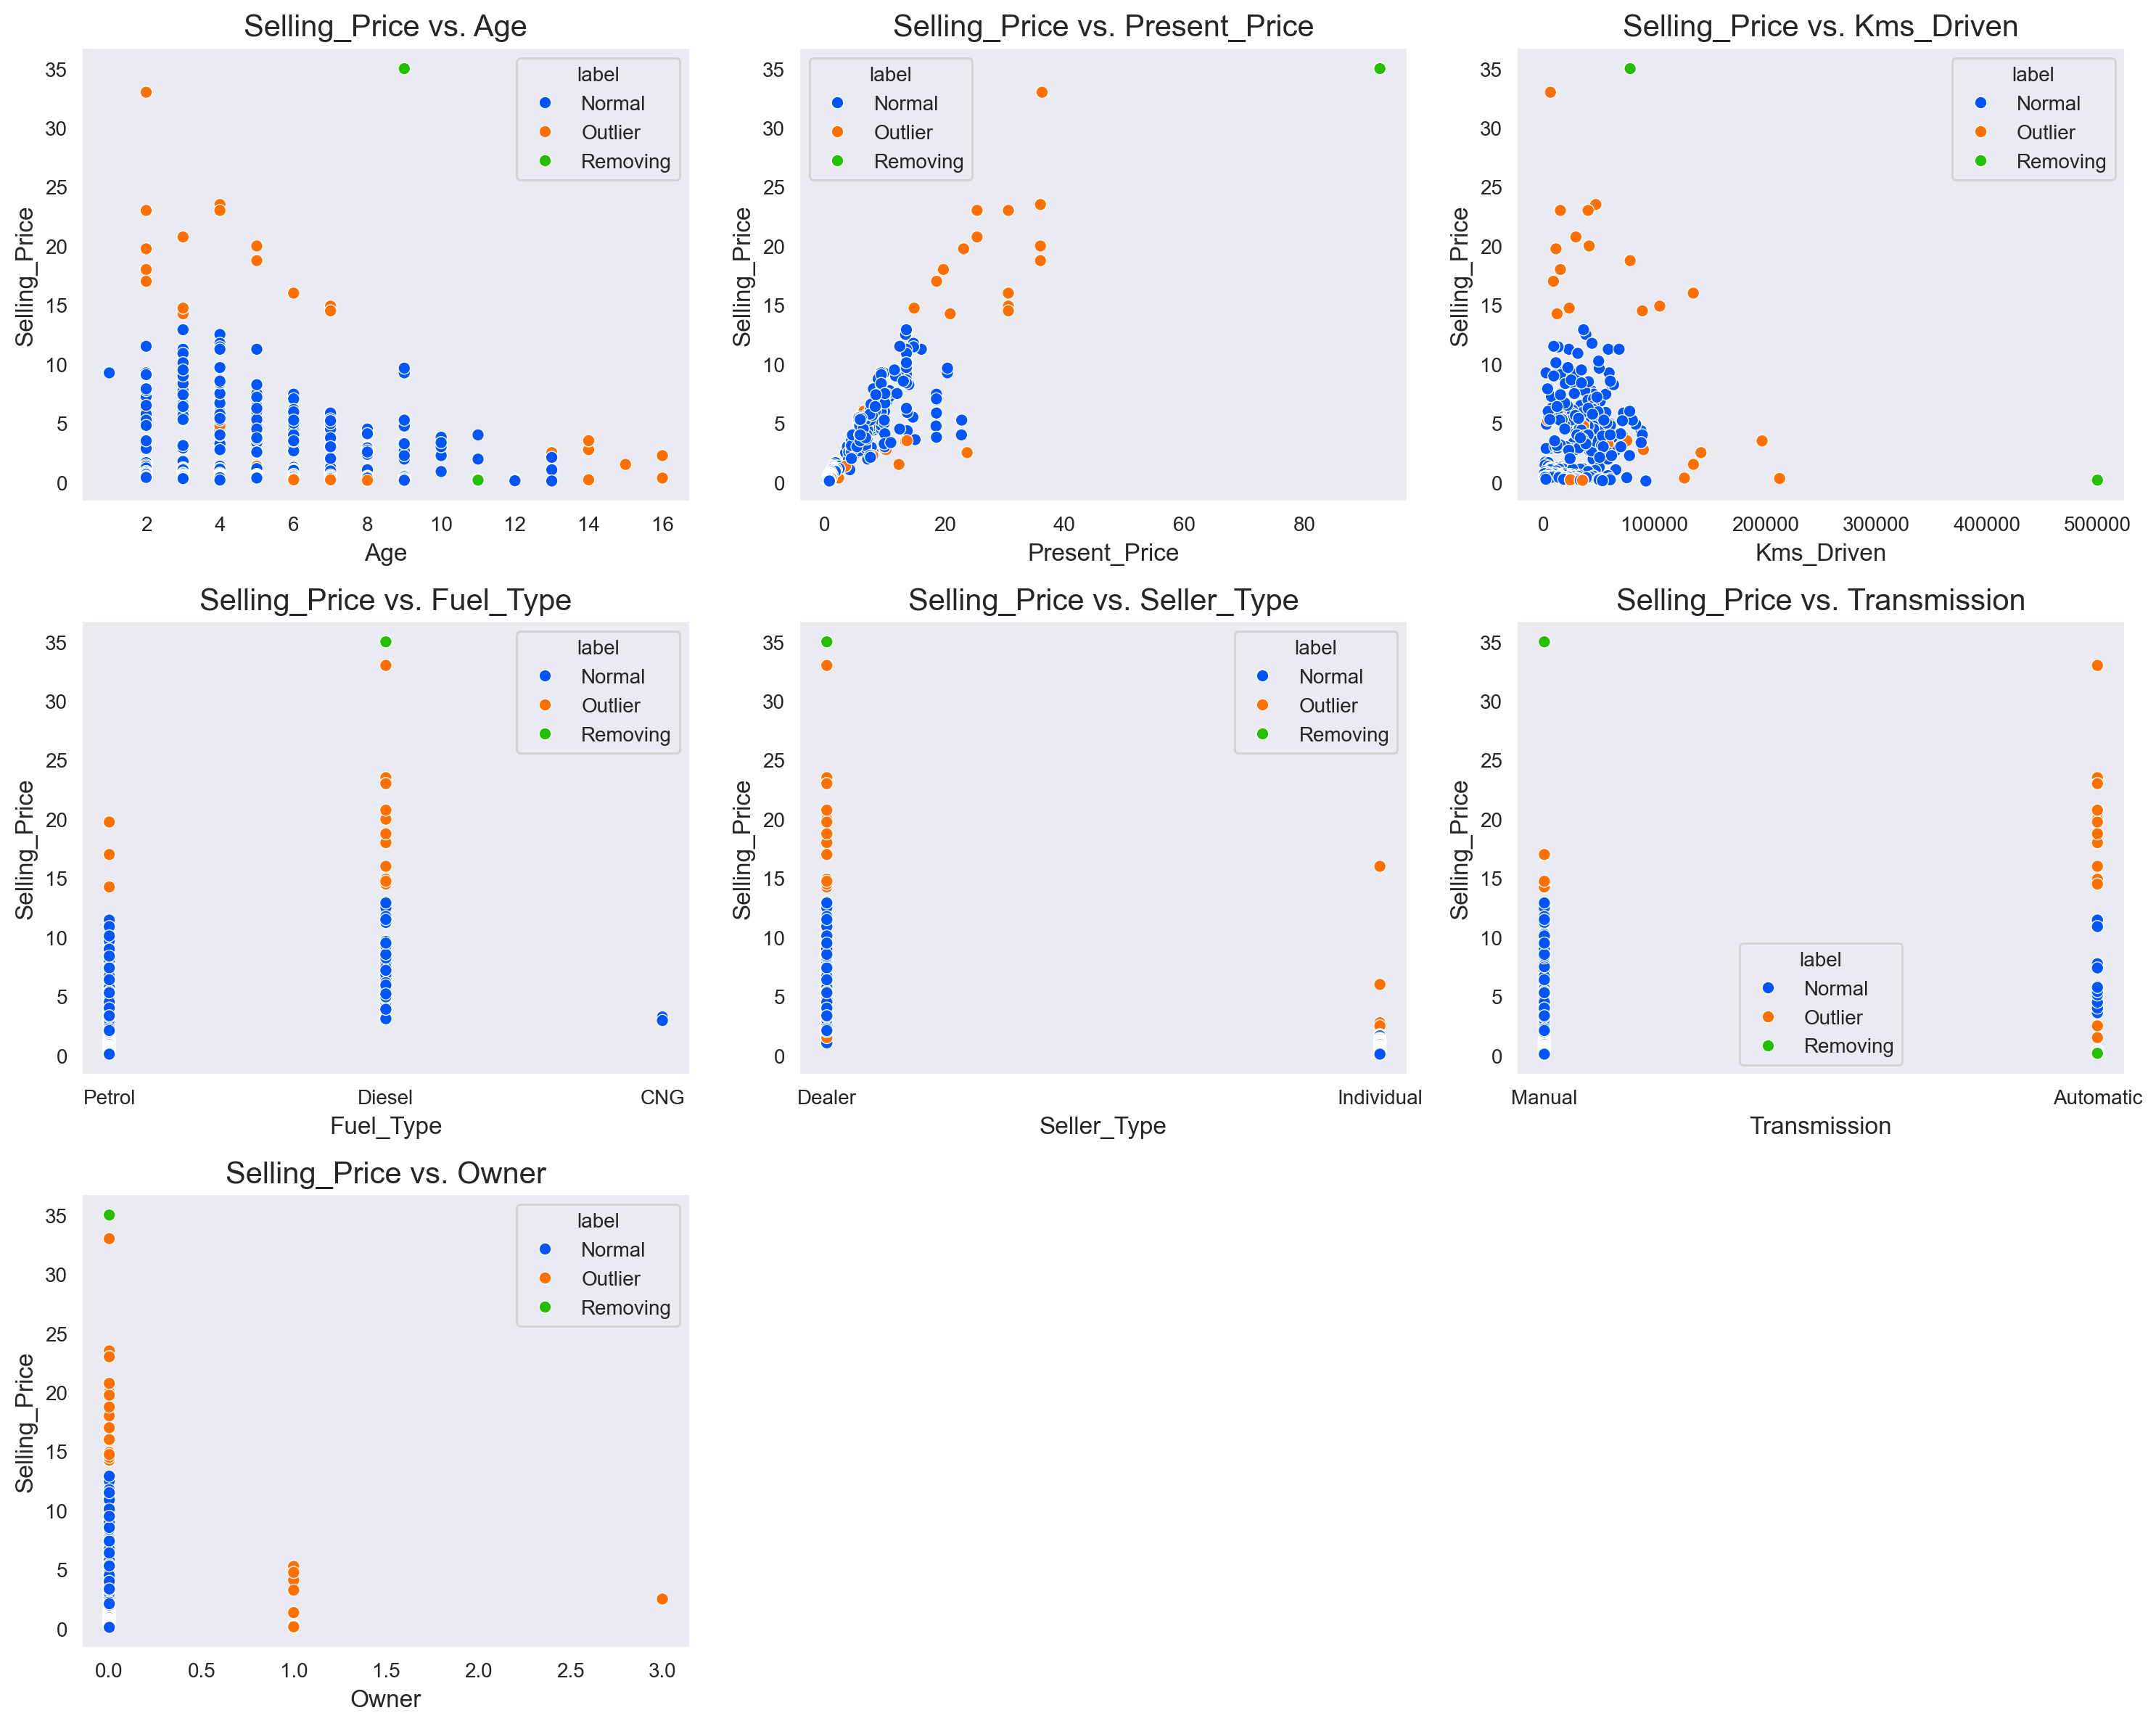

In [748]:
# Outliers Labeling
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'

# Removing Outliers
removing_indexes = []
removing_indexes.extend(df1[df1[target]>34.40000000000009].index)
removing_indexes.extend(df1[df1['Kms_Driven']>413900.00000001304].index)
df1.loc[removing_indexes,'label'] = 'Removing'

# Plot
target = 'Selling_Price'
features = df.columns.drop(target)
colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=df1, x=features[i], y=target, hue='label', ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.tight_layout()
plt.show()
   

In [749]:
removing_indexes = list(set(removing_indexes))
removing_indexes

[196, 86]

This line of code ensures that each index is stored only once, preventing duplicate deletions and errors

These 2 samples are quite different from the general pattern found in scatter plots of the data. Since Linear Regression is sensitive to outliers, we will drop them

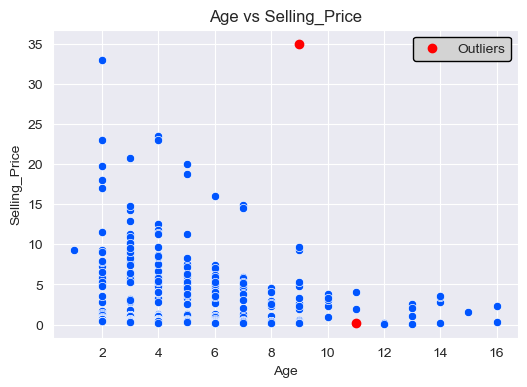

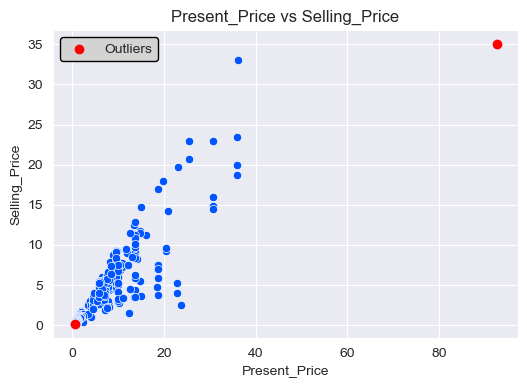

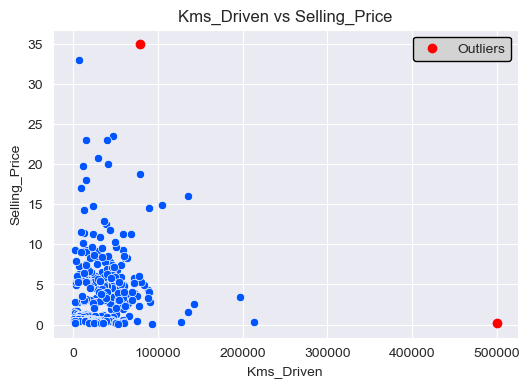

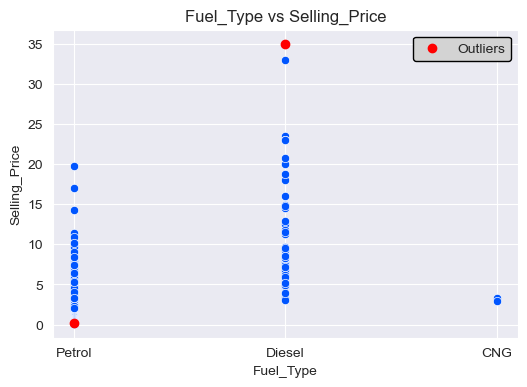

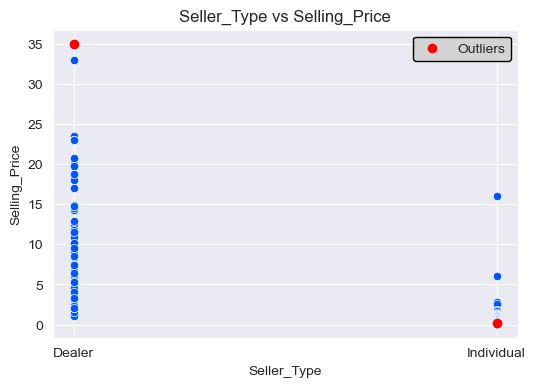

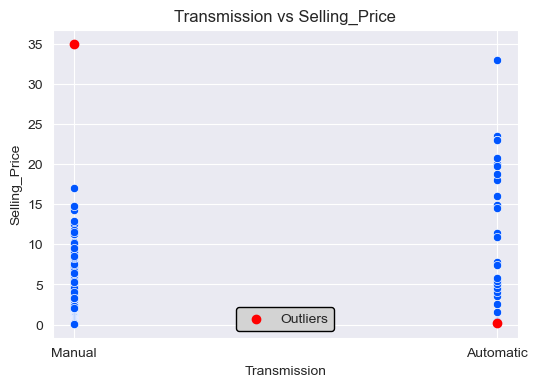

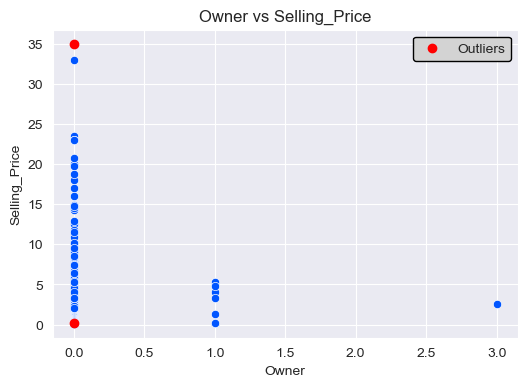

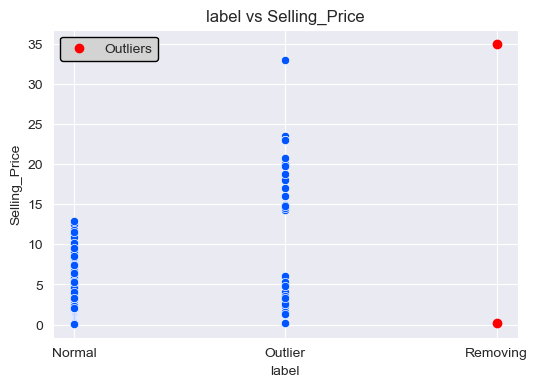

In [750]:
for col in df1.drop('Selling_Price', axis=1).columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df1, x=col, y='Selling_Price')
    plt.scatter(df1.loc[[196, 86], col], df1.loc[[196, 86], 'Selling_Price'], color='red', label='Outliers')
    plt.title(f'{col} vs Selling_Price')
    plt.legend(facecolor='lightgray', frameon=True, framealpha=1, edgecolor='black')
    plt.show()

In [751]:
#df1 = df.copy()
# Creates a copy of the original dataframe df so that you can make changes to df1 without #corrupting the original data
#df1.drop(removing_indexes, inplace=True)
#df1.reset_index(drop=True, inplace=True)
#After deleting rows, the indexes get messed up. This line:
# Recalculates the indexes (0 to n)

These 3 lines help create a clean version of the dataframe, with outliers removed and indexes sorted, ready for modeling or more detailed analysis

We removed just two samples as outliers
we run the model once with outliers removed and once with outliers present

In [752]:
# Identify discrete and continuous variables
discrete_vars = [col for col in df.columns if df1[col].nunique() < 10]
continuous_vars = [col for col in df1.columns if col not in discrete_vars]

# Ensure both lists have the same length
max_length = max(len(discrete_vars), len(continuous_vars))
discrete_vars += [""] * (max_length - len(discrete_vars))
continuous_vars += [""] * (max_length - len(continuous_vars))

# Create a properly formatted DataFrame
sorted_vars_df = pd.DataFrame({
    "Discrete Variables": sorted(discrete_vars),
    "Continuous Variables": sorted(continuous_vars)
})

# Display the table
print(sorted_vars_df)

  Discrete Variables Continuous Variables
0                                     Age
1          Fuel_Type           Kms_Driven
2              Owner        Present_Price
3        Seller_Type        Selling_Price
4       Transmission                label


In [753]:
df1 = df.copy()

In [754]:
df1


,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


EDA

C:\Users\abolfazl\AppData\Local\Temp\ipykernel_3420\2813059153.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(x=col, data=df1, ax=ax[i], palette=colors[i])
C:\Users\abolfazl\AppData\Local\Temp\ipykernel_3420\2813059153.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(x=col, data=df1, ax=ax[i], palette=colors[i])
C:\Users\abolfazl\AppData\Local\Temp\ipykernel_3420\2813059153.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(x=col, data=df1, ax=ax[i], palette=colors[i])
C:\Users\abolfazl\AppData\Local

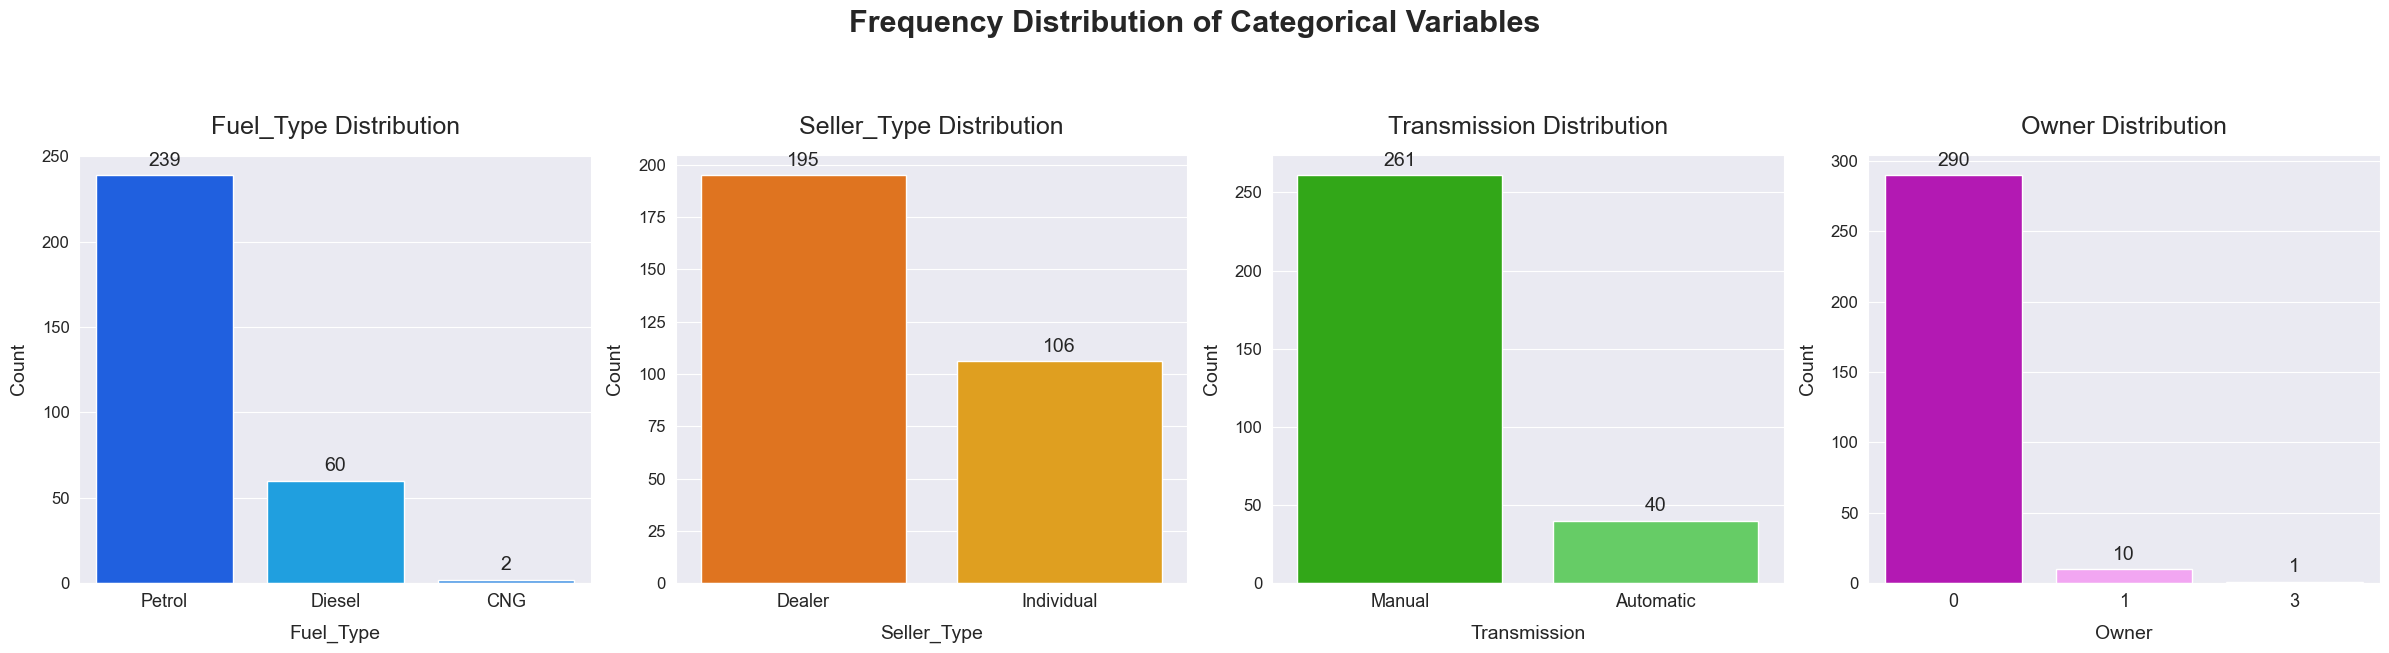

In [755]:
# Categorical columns
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
df1[CatCols] = df1[CatCols].astype(str)

# Colors
colors = [
    ['#0055ff', '#00aaff', '#3399ff'],         # Fuel_Type
    ['#ff7000', '#ffaa00'],                    # Seller_Type
    ['#23bf00', '#55dd55'],                    # Transmission
    ['#cc00cc', '#ff99ff', '#aa00aa', '#dd66dd']  # Owner
]

# Plot
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(24, 6), dpi=100)

for i, col in enumerate(CatCols):
    chart = sns.countplot(x=col, data=df1, ax=ax[i], palette=colors[i])
    ax[i].set_title(f'{col} Distribution', fontsize=18, pad=15)
    ax[i].set_xlabel(col, fontsize=14, labelpad=10)
    ax[i].set_ylabel('Count', fontsize=14, labelpad=10)
    ax[i].tick_params(axis='x', labelsize=13)
    ax[i].tick_params(axis='y', labelsize=12)

    # Add value labels on top of each bar
    for container in chart.containers:
        chart.bar_label(container, fontsize=14, padding=4)

# Main title with space
plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=22, fontweight='bold', y=1.08)
plt.tight_layout()
plt.show()

Fuel_Type vs Count
 • Petrol: ~238 cars
 • Diesel: ~99 cars
 • CNG: Only 2 cars

📌 Analysis:
 • Most cars use Petrol.
 • CNG is extremely rare, with only 2 samples. This might cause bias during model training or be ignored by the model completely.
 • Diesel cars are also common but less than Petrol.

⸻

2️⃣ Seller_Type vs Count
 • Dealer: ~194 entries
 • Individual: ~105 entries
 
 

📌 Analysis:
 • The majority of vehicles are sold by Dealers.
 • Individuals also sell cars, but less frequently.
 • This variable might influence selling price — dealers could price cars higher on average.

⸻

3️⃣ Transmission vs Count
 • Manual: 260 cars
 • Automatic: 39 cars

📌 Analysis:
 • Most cars are Manual transmission.
 • Automatic cars are much less common.
 • This imbalance might affect model performance, as the model will see much more Manual data than Automatic.
 conclusion:
  • There are 3 Fuel_Type categories. Petrol has the highest frequency and CNG has the least       frequency.
 • There are 2 Seller_Type categories. Dealer has the highest frequency and Individual has the least frequency.
 • There are 2 Transmission categories. Manual has the highest frequency and Automatic has the      least frequency
.owner:most of the cars are first-hand

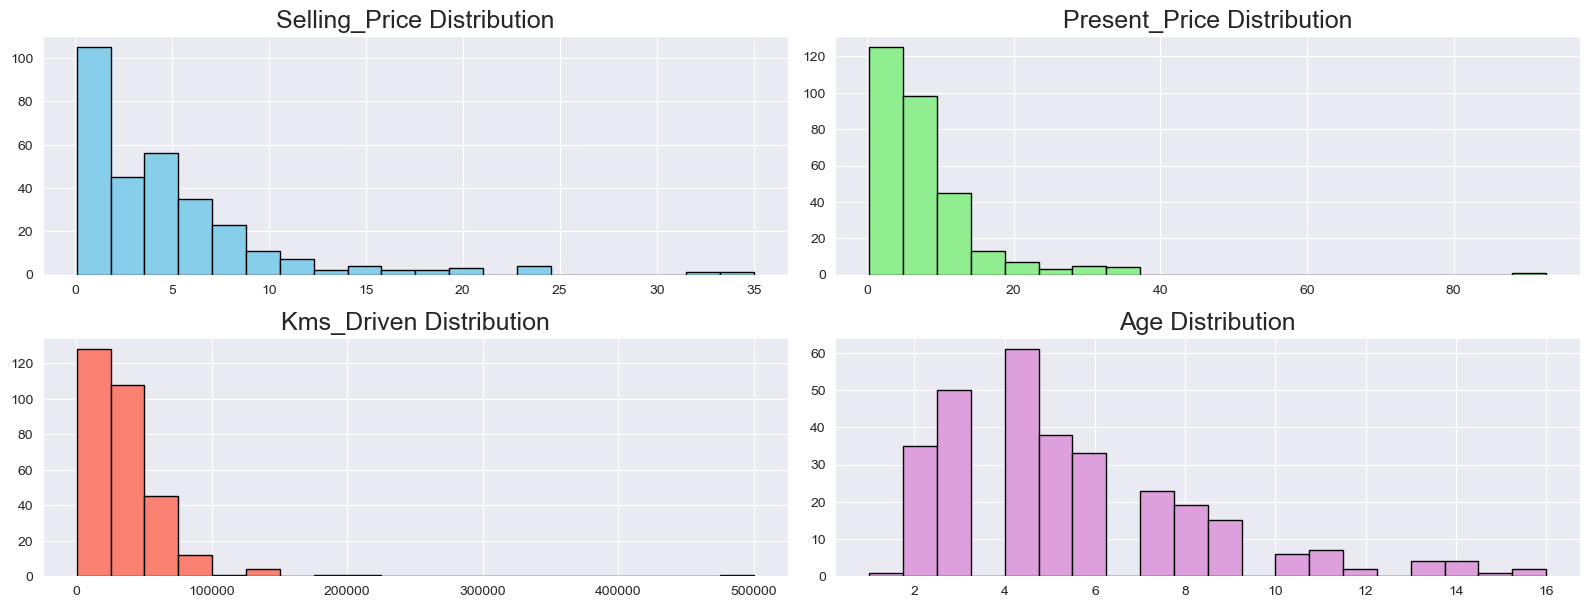

In [756]:
# list of 6 columns you want to chart
# colors list
colors = ['skyblue', 'lightgreen', 'salmon', 'plum', 'orange']
# numeric values 
columns = ['Selling_Price', 'Present_Price', 'Kms_Driven',"Age"]

# making a large figure with rhe right size 
plt.figure(figsize=(16, 12))

# loop for drawing each chart
for i, col in enumerate(columns):
    plt.subplot(4, 2, i + 1) 
    plt.hist(df1[col], bins=20, color=colors[i%len(colors)], edgecolor='black')
    plt.title(f"{col} Distribution",fontsize=18)

# adjusting distancesا
plt.tight_layout()
plt.show()

📊 1. Selling_Price Distribution
 • The distribution is highly right-skewed (also called left-tailed).
 • Most cars are sold for less than 5 lakhs (or million).
 • A small number of cars are priced above 10–12, indicating rare, high-value vehicles.



⸻

💰 2. Present_Price Distribution
 • Also right-skewed, but less extreme than Selling_Price.
 • Majority of cars have a present (new) price under 10–12 lakhs, though a few luxury cars exist.



⸻

🚗 3. Kms_Driven Distribution
 • Most cars are driven under 100,000 km.
 • Before cleaning, some records had over 800,000 km, which were likely outliers and now removed.
 • The distribution is more balanced and realistic now.



⏳ 4. Car_Age Distribution
 • The age distribution is fairly balanced.
 • Most vehicles are between 3 to 10 years old.
 • Very new or very old cars are rare.

.

⸻


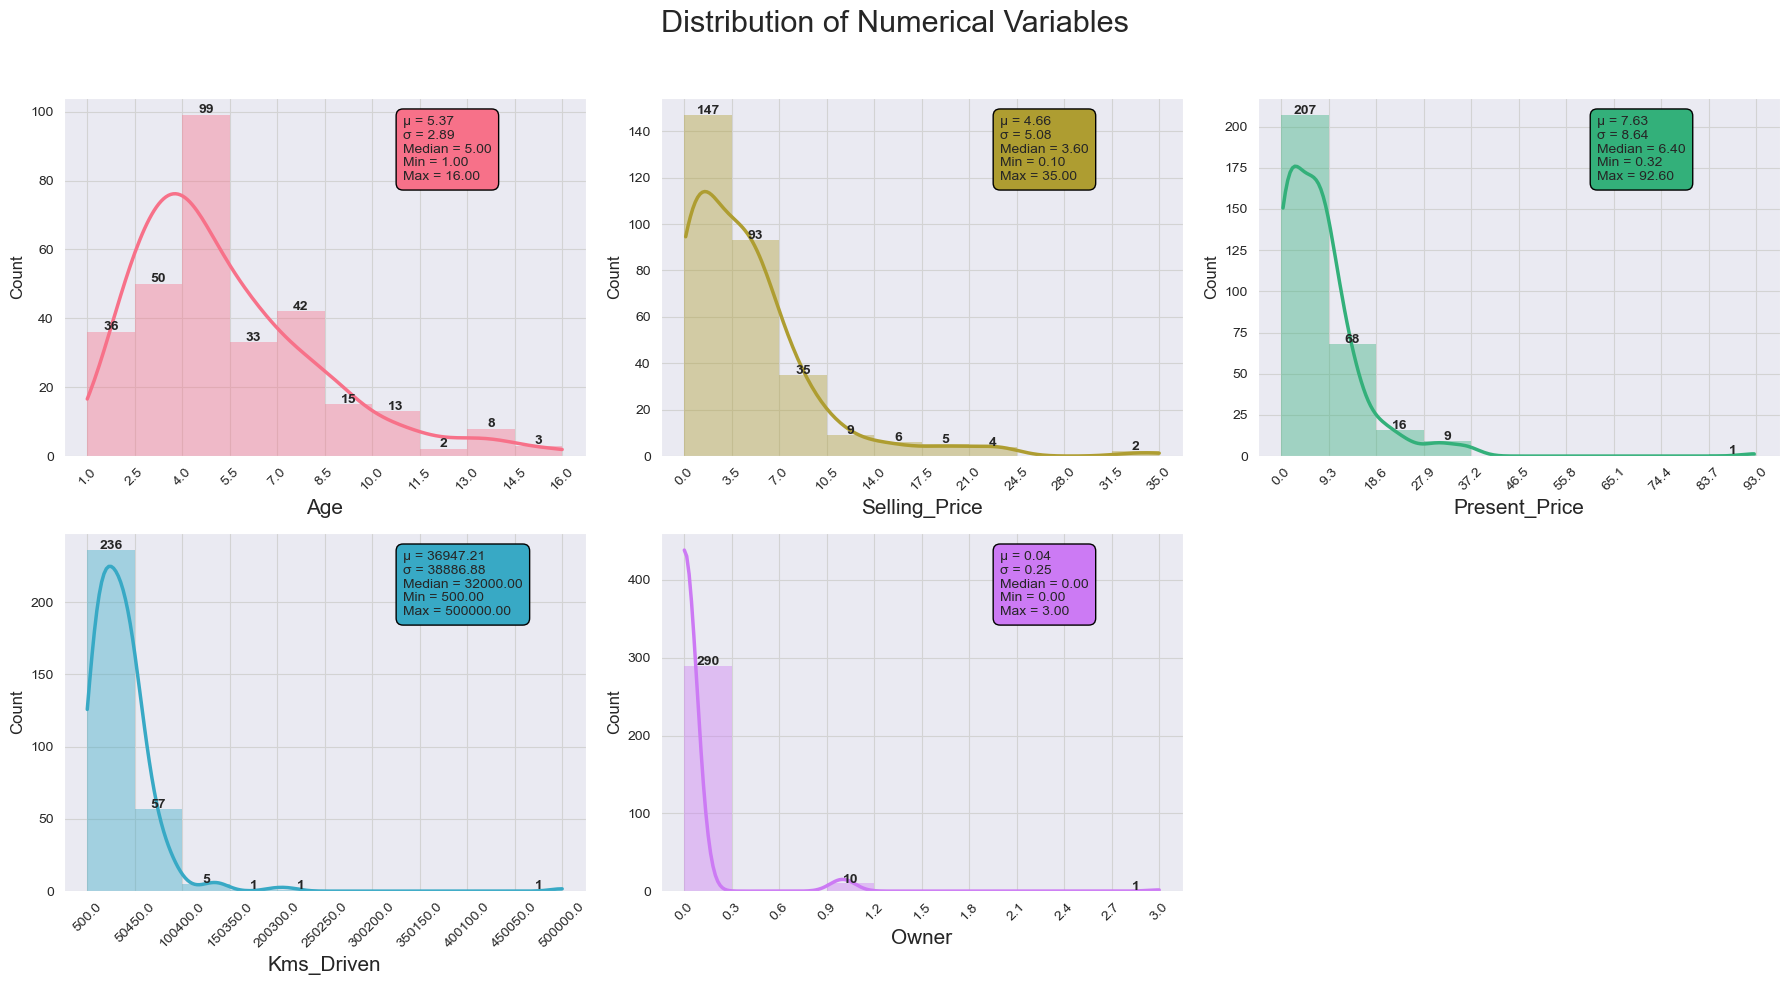

In [757]:

# Select numeric columns to plot
NumCols = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

# Setup subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), dpi=100)
colors = sns.color_palette("husl", len(NumCols))

for i in range(len(NumCols)):
    row = i // 3
    col = i % 3
    values, bin_edges = np.histogram(df[NumCols[i]], 
                                     range=(np.floor(df[NumCols[i]].min()), np.ceil(df[NumCols[i]].max())))
    
    graph = sns.histplot(data=df, x=NumCols[i], bins=bin_edges, kde=True, ax=ax[row, col],
                         edgecolor='none', color=colors[i], alpha=0.4, line_kws={'lw': 2.5})
    
    ax[row, col].set_xlabel(NumCols[i], fontsize=15)
    ax[row, col].set_ylabel('Count', fontsize=12)
    ax[row, col].set_xticks(np.round(bin_edges, 1))
    ax[row, col].set_xticklabels(ax[row, col].get_xticks(), rotation=45)
    ax[row, col].grid(color='lightgrey')

    for p in graph.patches:
        height = p.get_height()
        if height > 0:
            ax[row, col].annotate(f'{int(height)}',
                                  (p.get_x() + p.get_width() / 2, height + 0.5),
                                  ha='center', fontsize=10, fontweight="bold")

    stats_text = '\n'.join([
        f'μ = {df[NumCols[i]].mean():.2f}',
        f'σ = {df[NumCols[i]].std():.2f}',
        f'Median = {np.median(df[NumCols[i]]):.2f}',
        f'Min = {df[NumCols[i]].min():.2f}',
        f'Max = {df[NumCols[i]].max():.2f}'
    ])

    ax[row, col].text(0.65, 0.95, stats_text, transform=ax[row, col].transAxes,
                      fontsize=10, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor=colors[i], edgecolor='black', pad=0.5))

# Turn off the 6th empty plot
ax[1, 2].axis('off')

plt.suptitle('Distribution of Numerical Variables', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

All variables are right-skewed, meaning most values are concentrated on the left (lower values), with a long tail on the right (a few large values).

⸻

📊 Variable-wise Insights:
 1. Age:
 • Most cars are relatively new (1–5 years old).
 • A few cars are much older (right tail).
 • Right-skewed distribution.
 2. Selling_Price:
 • Most cars are sold at low to mid prices.
 • Very few expensive cars create a long right tail.
 • Strong right-skew → you may consider log transformation later if using regression.
 3. Present_Price:
 • Similar to Selling Price.
 • Majority of cars have moderate present prices.
 • Some cars were very expensive when new (outliers to the right).
 4. Kms_Driven:
 • Most cars are driven less than 100,000 km.
 • A small number of cars have very high mileage (over 200,000 or even 500,000).
 • This variable is also heavily skewed.
 5. Owner:
 • Almost all cars have had 0 or 1 previous owner.
 • Very few had more than 1 owner.
 • This could be a categorical-like variable due to low variation

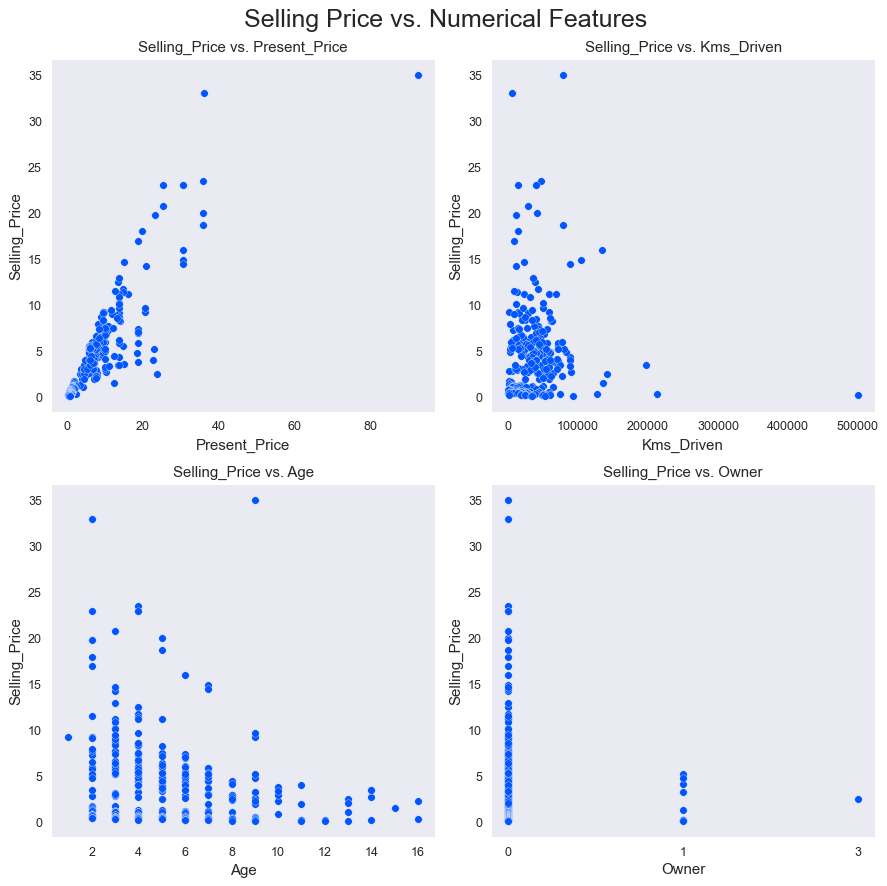

In [758]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
num_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(df1[num_features[i]], df1[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Selling Price vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

1. Selling_Price vs. Present_Price
 • There is a strong positive correlation.
 • As the current price (Present_Price) increases, the Selling_Price also increases.
 • This feature appears to be the most influential for predicting Selling_Price.

⸻

2. Selling_Price vs. Kms_Driven
 • There’s no clear linear pattern.
 • Generally, cars with higher mileage (Kms_Driven) tend to have a lower selling price, but the data is quite scattered.


⸻

3. Selling_Price vs. Age
 • A negative correlation is visible.
 • Older cars tend to sell for lower prices.
 • A fairly consistent downward trend is observed.

⸻

4. Selling_Price vs. Owner
 • Most vehicles have 0 or 1 previous owners.
 • As the number of previous owners increases, the selling price drops significantly.


⸻

✅ Overall Conclusion:
 • Present_Price and Age are the most impactful numerical predictors of Selling_Price.
 • Kms_Driven is noisy and might need transformation.
 • Owner has a negative effect on price but limited unique values

• As Present_Price increases, Selling_Price increases as well. So Selling_Price is directly proportional to Present_Price.
 • As the car's Kms_Driven increases, its Selling_Price decreases. So Selling_Price is inversely proportional to Kms_Driven.
 • As the car ages, its Selling_Price decreases. So Selling_Price is inversely proportional to the Age of the car.
 • As the number of previous car owners increases, its Selling_Price decreases. So Selling_Price is inversely proportional to Owner

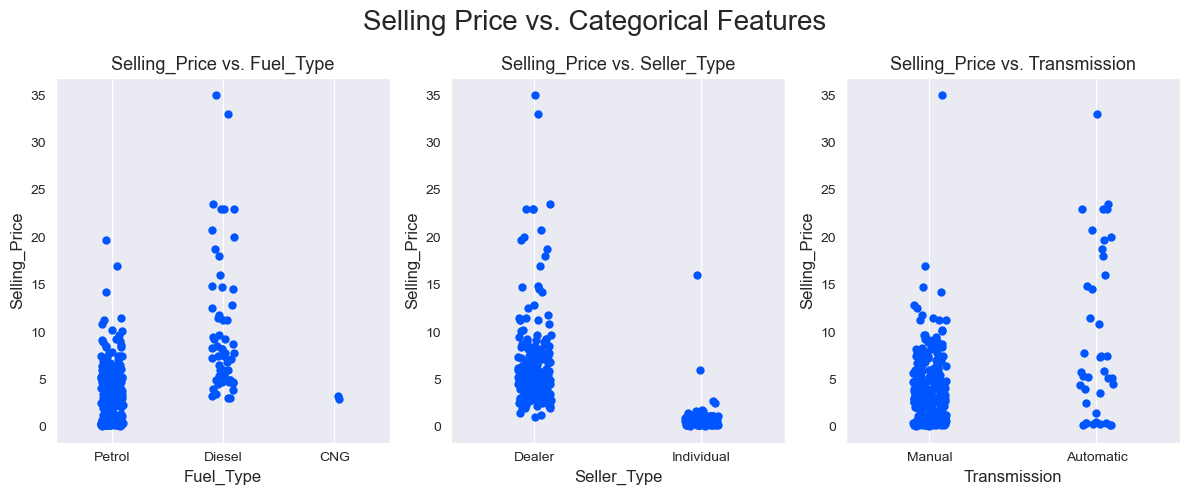

In [759]:
fig, axes = plt.subplots(nrows=1 ,ncols=3, figsize=(12,5), dpi=100)
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i], x=cat_features[i], y=target, data=df1, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, cat_features[i]), size = 13)
    axes[i].set_xlabel(cat_features[i], size = 12)
    axes[i].set_ylabel(target, size = 12)
    axes[i].grid()

plt.suptitle('Selling Price vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

• Diesel Cars > CNG Cars > Petrol Cars in terms of Selling_Price.
 • The Selling_Price of cars sold by individuals is lower than the price of cars sold by dealers.
 • Automatic cars are more expensive than manual cars

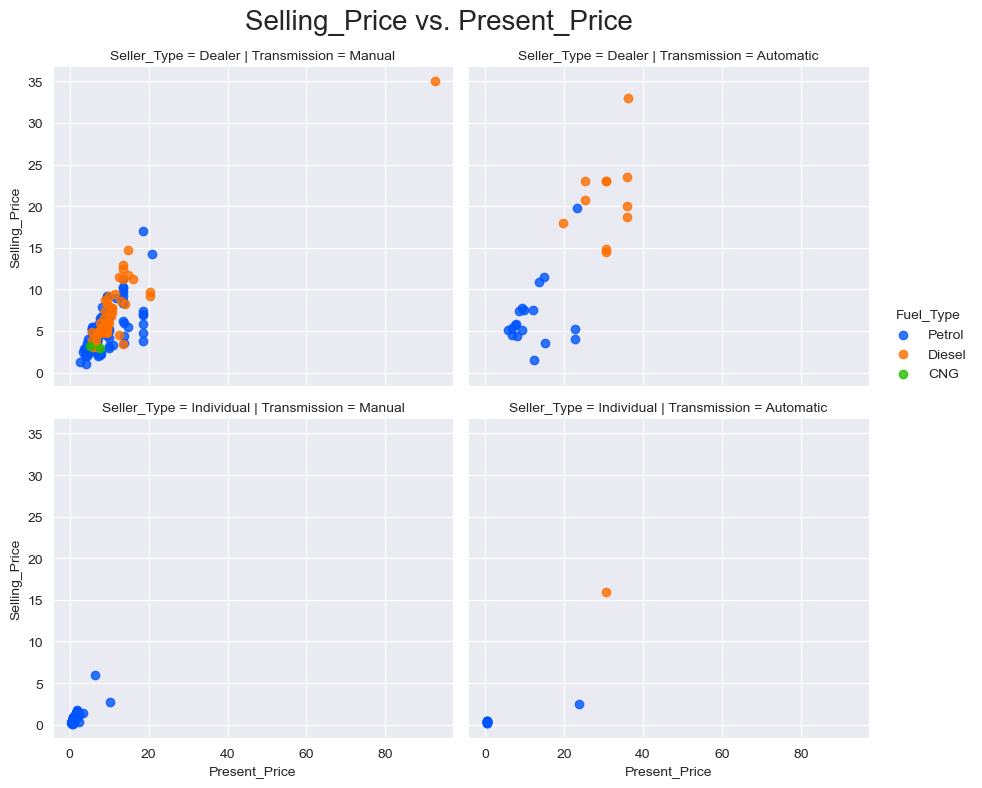

In [760]:
graph = sns.lmplot(x='Present_Price', y='Selling_Price', data= df1, fit_reg=False, row='Seller_Type',
                   col='Transmission', hue='Fuel_Type', palette=CustomPalette, height=4, aspect=1)   

plt.suptitle('Selling_Price vs. Present_Price', fontsize=20) 
sns.move_legend(graph, "lower center", bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.tight_layout()
plt.show()

This code allows you to see:
• What is the relationship between the current price and the final sale price
• And whether this relationship is affected by:
• Type of seller (individual or dealer)
• Type of transmission (automatic or manual)
• Type of fuel (gasoline, diesel, CNG, etc.)

• All of the Individual Seller_Type have had Petrol cars.
 • Diesel cars all have belonged to the Dealer Seller_Type.
 • All of the CNG cars have had Manual Transmission and have belonged to Dealer Seller_Type

🔍 Checking Outliers in Numeric Columns:

📊 Selling_Price
  Q1: 0.90, Q3: 6.00, IQR: 5.10
  Lower Bound: -6.75, Upper Bound: 13.65
  Outliers: 17 rows (5.65%)


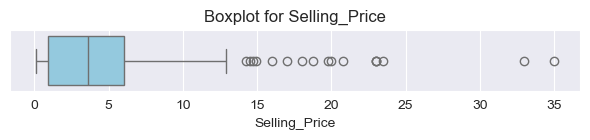


📊 Present_Price
  Q1: 1.20, Q3: 9.90, IQR: 8.70
  Lower Bound: -11.85, Upper Bound: 22.95
  Outliers: 14 rows (4.65%)


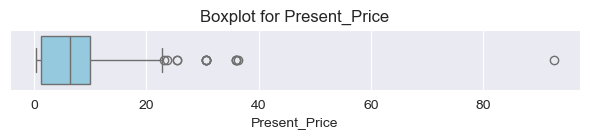


📊 Kms_Driven
  Q1: 15000.00, Q3: 48767.00, IQR: 33767.00
  Lower Bound: -35650.50, Upper Bound: 99417.50
  Outliers: 8 rows (2.66%)


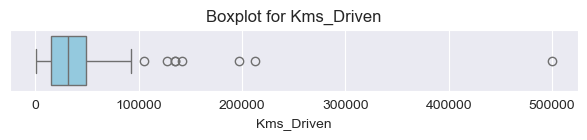


📊 Age
  Q1: 3.00, Q3: 7.00, IQR: 4.00
  Lower Bound: -3.00, Upper Bound: 13.00
  Outliers: 7 rows (2.33%)


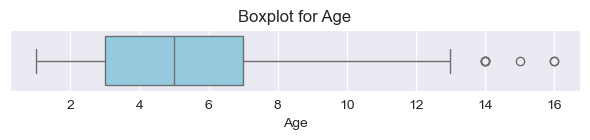

In [761]:
# Identify numeric and categorical columns
numerical_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']

# -----------------------------
# 1️⃣ NUMERICAL OUTLIERS (IQR)
# -----------------------------

print("🔍 Checking Outliers in Numeric Columns:")
for col in numerical_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df1[(df1[col] < lower) | (df1[col] > upper)]
    percentage = (len(outliers) / len(df1)) * 100
    
    print(f"\n📊 {col}")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower:.2f}, Upper Bound: {upper:.2f}")
    print(f"  Outliers: {len(outliers)} rows ({percentage:.2f}%)")

    # Boxplot
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()


    

In [762]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
# List of categorical variables to test against the target
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
target = 'Selling_Price'

# Loop through each categorical feature
for col in categorical_cols:
    print(f"\n🔹 ANOVA for '{col}' on '{target}':\n")

    # Build an Ordinary Least Squares (OLS) model
    model = ols(f'{target} ~ C({col})', data=df1).fit()

    # Perform ANOVA on the fitted model
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Print the ANOVA summary table
    print(anova_table)

    # Extract the p-value from the table
    p_value = anova_table['PR(>F)'][0]

    # Interpret the result: check statistical significance
    if p_value < 0.05:
        print(f"✅ The effect of '{col}' on '{target}' is statistically significant (p-value = {p_value:.4f})")
    else:
        print(f"❌ No statistically significant effect of '{col}' on '{target}' (p-value = {p_value:.4f})")


🔹 ANOVA for 'Fuel_Type' on 'Selling_Price':

                   sum_sq     df          F        PR(>F)
C(Fuel_Type)  2364.563414    2.0  65.414894  2.803925e-24
Residual      5385.928581  298.0        NaN           NaN
✅ The effect of 'Fuel_Type' on 'Selling_Price' is statistically significant (p-value = 0.0000)

🔹 ANOVA for 'Seller_Type' on 'Selling_Price':

                     sum_sq     df           F        PR(>F)
C(Seller_Type)  2350.698347    1.0  130.164012  2.852420e-25
Residual        5399.793647  299.0         NaN           NaN
✅ The effect of 'Seller_Type' on 'Selling_Price' is statistically significant (p-value = 0.0000)

🔹 ANOVA for 'Transmission' on 'Selling_Price':

                      sum_sq     df          F        PR(>F)
C(Transmission)  1044.632231    1.0  46.577926  4.901447e-11
Residual         6705.859764  299.0        NaN           NaN
✅ The effect of 'Transmission' on 'Selling_Price' is statistically significant (p-value = 0.0000)


C:\Users\abolfazl\AppData\Local\Temp\ipykernel_3420\2117139511.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\abolfazl\AppData\Local\Temp\ipykernel_3420\2117139511.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\abolfazl\AppData\Local\Temp\ipykernel_3420\2117139511.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_ta

All three categorical features:
• Fuel_Type
• Seller_Type
• Transmission

Statistically, they have a significant impact on Selling_Price (because the p-value is much smaller than 0.05)

In [763]:
#encoding
if 'Fuel_Type' in df1.columns:
    df1['Fuel_Type'] = df1['Fuel_Type'].replace({
        'Petrol': 2,
        'Diesel': 3,
        'CNG': 4
    })

if 'Seller_Type' in df1.columns:
    df1['Seller_Type'] = df1['Seller_Type'].replace({
        'Dealer': 2,
        'Individual': 3
    })

if 'Transmission' in df1.columns:
    df1['Transmission'] = df1['Transmission'].replace({
        'Manual': 2,
        'Automatic': 3
    })
    
if 'Owner' in df1.columns:
    df1['Owner'] = df1['Owner'].replace({
        'First Owner': 0,
        'Second Owner': 1,
        'Fourth & Above Owner': 3,
        
    })

df1

C:\Users\abolfazl\AppData\Local\Temp\ipykernel_3420\390807441.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Fuel_Type'] = df1['Fuel_Type'].replace({
C:\Users\abolfazl\AppData\Local\Temp\ipykernel_3420\390807441.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Seller_Type'] = df1['Seller_Type'].replace({
C:\Users\abolfazl\AppData\Local\Temp\ipykernel_3420\390807441.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,2,2,2,0
1,6,4.75,9.54,43000,3,2,2,0
2,2,7.25,9.85,6900,2,2,2,0
3,8,2.85,4.15,5200,2,2,2,0
4,5,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,3,2,2,0
297,4,4.00,5.90,60000,2,2,2,0
298,10,3.35,11.00,87934,2,2,2,0
299,2,11.50,12.50,9000,3,2,2,0


In [764]:
print(pd.unique(data["Owner"]))
df1['Owner'] = pd.to_numeric(df1['Owner'], errors='coerce')

[0 1 3]


In [765]:
df1['Owner'] = pd.to_numeric(df1['Owner'], errors='coerce')

In [766]:
print(df1.dtypes)

Age                int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int64
Seller_Type        int64
Transmission       int64
Owner              int64
dtype: object


Categorical Variables Encoding¶

In [767]:
# calculate corr
correlation_matrix = df.corr(numeric_only=True)


print(correlation_matrix)

                    Age  Selling_Price  Present_Price  Kms_Driven     Owner
Age            1.000000      -0.236141       0.047584    0.524342  0.182104
Selling_Price -0.236141       1.000000       0.878983    0.029187 -0.088344
Present_Price  0.047584       0.878983       1.000000    0.203647  0.008057
Kms_Driven     0.524342       0.029187       0.203647    1.000000  0.089216
Owner          0.182104      -0.088344       0.008057    0.089216  1.000000


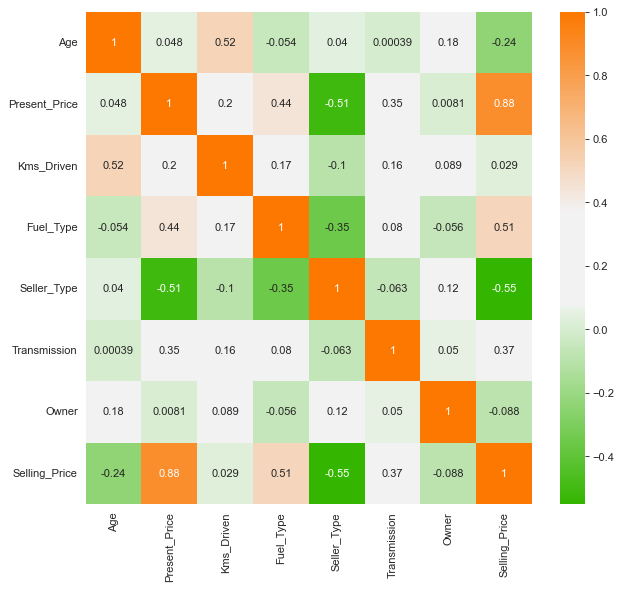

In [768]:
#Correlation Analysis¶

target = 'Selling_Price'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([df1.drop(target,axis=1), df1[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

• The target variable "Selling Price" is highly correlated with Present_Price & Seller_Type & Fuel_Type.
 • Some independent variables like Fuel_Type_Petrol and Fuel_Type_Disel are highly correlated, which is called Multicollinearity.

In [769]:

# corr just with Selling_Price
selling_corr = df1.corr(numeric_only=True)['Selling_Price'].sort_values(ascending=False)
print(selling_corr)


Selling_Price    1.000000
Present_Price    0.878983
Fuel_Type        0.509467
Transmission     0.367128
Kms_Driven       0.029187
Owner           -0.088344
Age             -0.236141
Seller_Type     -0.550724
Name: Selling_Price, dtype: float64


In [770]:
# 🔹 Present_Price:
# This has the strongest positive correlation with Selling_Price (~0.88). It means that as the current price of the car increases, its selling price also tends to be higher.

# 🔹 Fuel_Type_Diesel:
# Positively correlated with Selling_Price (~0.55). Diesel cars generally sell for higher prices.

# 🔹 Kms_Driven:
# Very weak correlation (~0.06). The number of kilometers driven doesn’t have a strong effect on the selling price.

# 🔹 Owner:
# Slight negative correlation (~-0.09). Cars with more previous owners tend to have slightly lower selling prices.

# 🔹 Age:
# Moderate negative correlation (~-0.28). Older cars usually sell for less.

# 🔹 Transmission_Manual:
# Negative correlation (~-0.41). Manual transmission cars tend to sell for lower prices than automatics.

# 🔹 Fuel_Type_Petrol:
# Strong negative correlation (~-0.53). Petrol cars sell for less compared to Diesel.

# 🔹 Seller_Type_Individual:
# Strong negative correlation (~-0.57). Cars sold by individuals are usually cheaper than those sold by dealers.

In [771]:
# 🔍 Detailed Analysis by Category:

# ✅ Diesel_Manual
#  • Highest median selling price among all combinations.
#  • Wide price range (the box is tall), showing high price variability.
#  • Suggests that Diesel + Manual cars are generally more powerful and valuable.

# ⸻

# ✅ Diesel_Automatic
#  • Also has a relatively high price range, slightly below Diesel_Manual.
#  • Represents comfort and power — common in premium models.

# ⸻

# ✅ Petrol_Manual
#  • Most common category.
#  • Lower median price than diesel cars.
#  • Includes a few outliers (dots above the whiskers) — likely some high-end petrol cars, but generally cheaper.

# ⸻

# ⚠️ CNG_Manual
#  • Lowest selling price overall.
#  • Very tight price range (short box).
#  • Most likely older, cheaper, or less in demand cars.

# ⸻

# 🧠 Conclusion:

# Category Price Level Interpretation
# Diesel_Manual 🔼 High Valuable, powerful, wide demand
# Diesel_Automatic 🔼 Mid-high Premium and comfortable
# Petrol_Manual 🔽 Lower More affordable, economical
# CNG_Manual ⚠️ Lowest Niche market, low resale value


# ⸻

# ✅ Modeling Insight:
#  • Fuel_Trans has a clear impact on Selling_Price.
#  • This feature is important and should be included in your model.


# ⸻


Determine Feature & Target Variables

In [772]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [773]:
# Separate features and target
X = df1.drop('Selling_Price', axis=1)  # Features
y = df1['Selling_Price'].values.reshape(-1, 1)  # Target reshaped to 2D array

In [774]:
X

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,5.59,27000,2,2,2,0
1,6,9.54,43000,3,2,2,0
2,2,9.85,6900,2,2,2,0
3,8,4.15,5200,2,2,2,0
4,5,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...
296,3,11.60,33988,3,2,2,0
297,4,5.90,60000,2,2,2,0
298,10,11.00,87934,2,2,2,0
299,2,12.50,9000,3,2,2,0


In [775]:
#Split Dataset to Training & Test Sets

In [776]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [777]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (240, 7)
X_test shape:  (61, 7)
y_train shape:  (240, 1)
y_test shape:  (61, 1)


In [778]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

it is very important that StandardScaler transformation should only be learnt from the training set, otherwise it will lead to data leakage

In [779]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)  

LinearRegression()

In [780]:
pd.DataFrame(
    data = np.append(model.intercept_ , model.coef_), 
    index = ['Intercept'] + [col + " Coef." for col in X.columns], 
    columns = ['Value']
).sort_values('Value', ascending=False)

,Value
Intercept,4.520250
Present_Price Coef.,3.912770
Fuel_Type Coef.,0.611092
Transmission Coef.,0.468792
Kms_Driven Coef.,-0.230684
Owner Coef.,-0.236634
Seller_Type Coef.,-0.538779
Age Coef.,-1.156583


In [781]:
#interpreter:
print(model.intercept_)
#slope
print(model.coef_)

[4.52025]
[[-1.15658325  3.91276957 -0.23068376  0.6110919  -0.53877892  0.46879187
  -0.2366336 ]]


• Most important positive feature: Present_Price → Current price of the car
• Most important negative feature: Age → Age of the car
• Features like Fuel_Type and Owner also have an impact, but less so

In [782]:
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test_scaled)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

In [783]:
model_evaluation(model, X_test_scaled, y_test, 'Linear Reg.')

,Linear Reg.
MAE,1.000033
MSE,2.188556
RMSE,1.479377
R2-Score,0.913418


In [784]:
#cross validation
#from sklearn.model_selection import cross_val_score, KFold
#from sklearn.linear_model import LinearRegression
#import numpy as np

#model=LinearRegression()
#define kfold with 10
#k_fold=KFold(5)
#scores=cross_val_score(model, X,y.ravel(),cv=k_fold,n_jobs=1)
#scores


In [785]:
#len(df1)/6

In [786]:
#df_cleaned = df1[(df1.index < 120) | (df1.index > 210)].copy()
#df_cleaned.reset_index(drop=True, inplace=True)


In [787]:
#X2 = df_cleaned.drop('Selling_Price', axis=1)
#y2 = df_cleaned['Selling_Price']
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics

# split
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)

#scaler=StandardScaler()
#scaler.fit(X_train2)
#X_train2_scaled=scaler.transform(X_train2)
#X_test2_scaled=scaler.transform(X_test2)


# creat and train model
#model2 = LinearRegression()
#model2.fit(X_train2_scaled, y_train2)

# predict and evaluation
#y_pred2 = model2.predict(X_test2_scaled)

#print("R² Score:", metrics.r2_score(y_test2, y_pred2))

Because our situation got worse with the cross-validation score, we won't do this step

In [788]:
y_pred = model.predict(X_test_scaled)

In [789]:
X_test.insert(7,'y_test',y_test)
X_test.insert(8,'y_pred',y_pred)
X_test

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,y_test,y_pred
223,4,9.400,61381,3,2,2,0,8.25,7.151094
150,8,0.826,6000,2,3,2,0,0.50,-0.423598
226,4,5.700,24678,2,2,2,0,5.25,4.293174
296,3,11.600,33988,3,2,2,0,9.50,8.654527
52,2,19.770,15000,3,2,3,0,18.00,14.156778
...,...,...,...,...,...,...,...,...,...
137,6,0.787,16000,2,3,2,0,0.65,0.289706
227,8,4.430,57000,2,2,2,0,2.55,1.990973
26,6,5.870,55138,2,2,2,0,4.15,3.415110
106,5,3.450,16500,2,3,2,1,1.35,0.853054


🔍 evaluation:
              R2     MAE
method                  
zeroed    0.9236  0.8957
absolute  0.9180  0.9475

🎯 best method (max R²): «zeroed» or R² = 0.9236


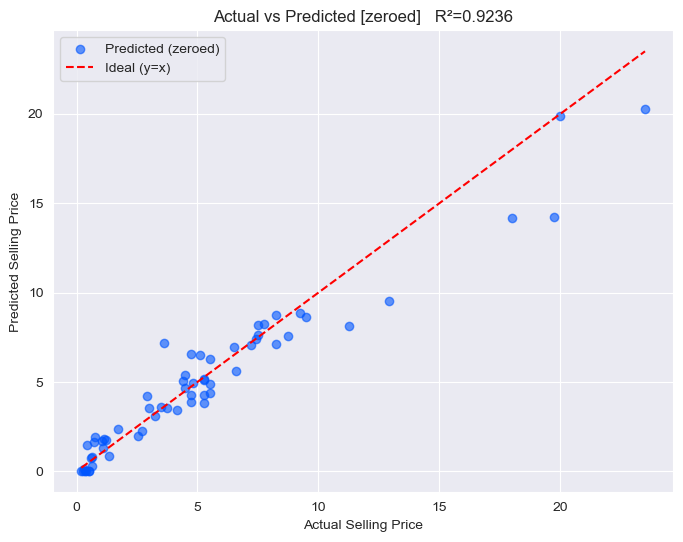

In [790]:
#Selling a car or any real product cannot have a negative price
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

def refine_predictions(y_test, y_pred, plot=True):
    """
  
    Given the true target values (y_true) and
    a set of raw predictions (y_pred), try two strategies:
      - Strategy A: Clip all predictions at 0 (no negatives).
      - Strategy B: Take absolute value of all predictions.
    Compute the R² for each, and return the “best” adjusted
    predictions along with its R² and which strategy won.
    
    Parameters
    ----------
    y_true : array‐like of shape (n_samples,)
        The ground‐truth target values.
    y_pred : array‐like of shape (n_samples,)
        Raw model predictions, possibly containing negatives.
    
    Returns
    -------
    y_best : np.ndarray of shape (n_samples,)
        The adjusted predictions from the winning strategy.
    best_r2 : float
        The R² score achieved by y_best against y_true.
    best_strategy : str
        Either 'clip_to_zero' or 'absolute_value', indicating
        which adjustment was bette.
    """

    #  Strategy A: clip negative values up to zero
    y_zero = np.clip(y_pred, 0, None)
    # 2)Strategy B: take absolute value of prediction
    y_abs  = np.abs(y_pred)

    # calculate
    methods = {
        "zeroed":   y_zero,
        "absolute": y_abs
    }
    results = []
    for name, y_mod in methods.items():
        results.append({
            "method": name,
            "R2":  r2_score(y_test, y_mod),
            "MAE": mean_absolute_error(y_test, y_mod)
        })
    df_res = pd.DataFrame(results).set_index("method")[["R2","MAE"]]
    df_res["R2"]  = df_res["R2"].round(4)
    df_res["MAE"] = df_res["MAE"].round(4)

    print("🔍 evaluation:")
    print(df_res, end="\n\n")

    #choose R2
    best = df_res["R2"].idxmax()
    print(f"🎯 best method (max R²): «{best}» or R² = {df_res.loc[best,'R2']}")

    y_final = methods[best]

    # draw
    if plot:
        plt.figure(figsize=(8,6))
        plt.scatter(y_test, y_final, alpha=0.6, label=f'Predicted ({best})')
        mn, mx = y_test.min(), y_test.max()
        plt.plot([mn,mx],[mn,mx],'r--',label='Ideal (y=x)')
        plt.xlabel("Actual Selling Price")
        plt.ylabel("Predicted Selling Price")
        plt.title(f"Actual vs Predicted [{best}]   R²={df_res.loc[best,'R2']}")
        plt.legend()
        plt.grid(True)
        plt.show()

    return y_final, df_res

y_refined, comparison = refine_predictions(y_test, y_pred)

In [791]:
y_pred=y_refined

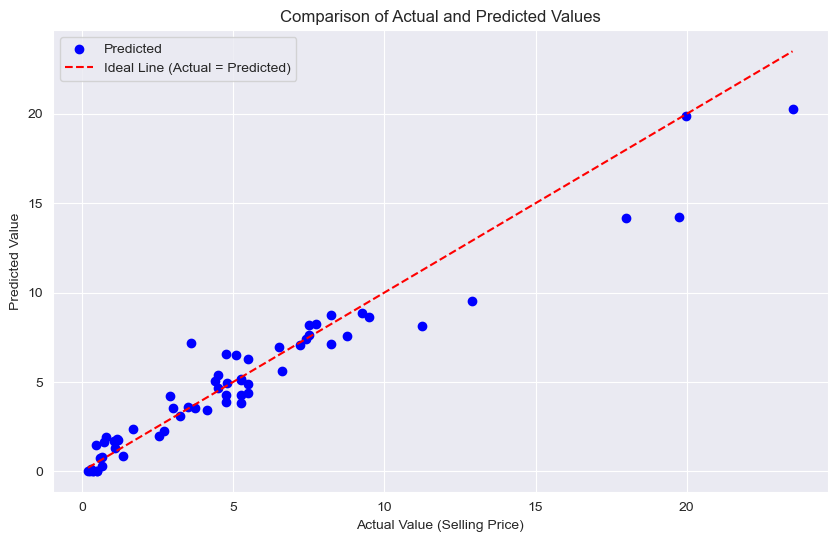

In [792]:
# Predict y on the test data


# Plotting the results
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line (Actual = Predicted)')
plt.xlabel("Actual Value (Selling Price)")
plt.ylabel("Predicted Value")
plt.title("Comparison of Actual and Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

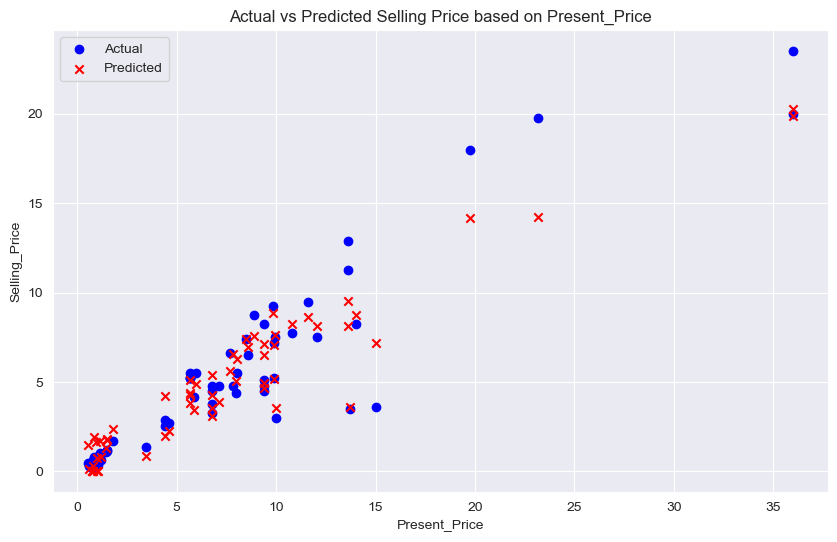

In [793]:
# 📌 Step 8: Visualize Actual vs Predicted (e.g., Present_Price vs Selling_Price)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Present_Price'], y_test, label='Actual', color='blue')
plt.scatter(X_test['Present_Price'], y_pred, label='Predicted', color='red', marker='x')
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.title('Actual vs Predicted Selling Price based on Present_Price')
plt.legend()
plt.grid(True)
plt.show()

Comparison of actual and predicted selling price (Selling_Price) based on a specific attribute (here: Present_Price)

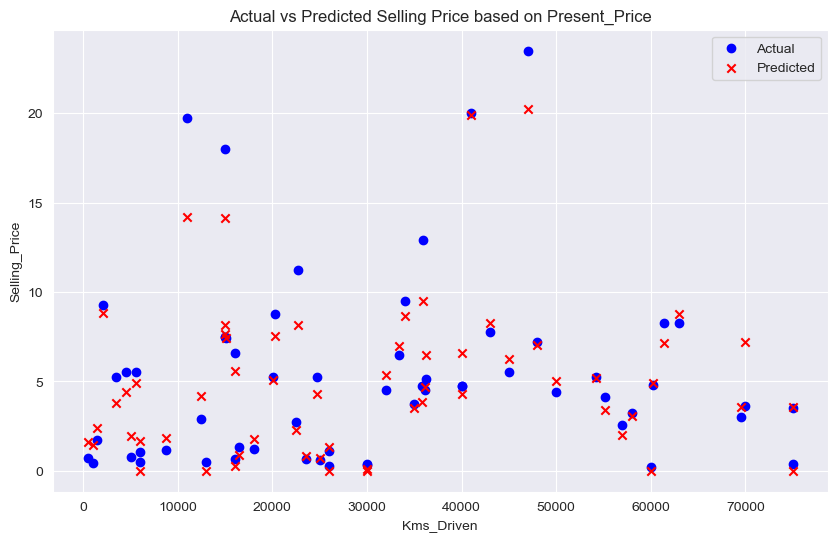

In [794]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Kms_Driven'], y_test, label='Actual', color='blue')
plt.scatter(X_test['Kms_Driven'], y_pred, label='Predicted', color='red', marker='x')
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')
plt.title('Actual vs Predicted Selling Price based on Present_Price')
plt.legend()
plt.grid(True)
plt.show()

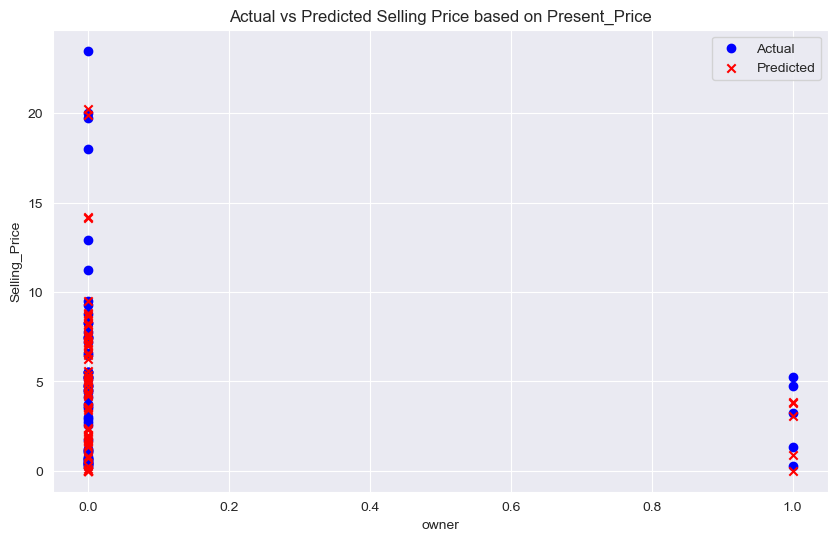

In [795]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Owner'], y_test, label='Actual', color='blue')
plt.scatter(X_test['Owner'], y_pred, label='Predicted', color='red', marker='x')
plt.xlabel('owner')
plt.ylabel('Selling_Price')
plt.title('Actual vs Predicted Selling Price based on Present_Price')
plt.legend()
plt.grid(True)
plt.show()

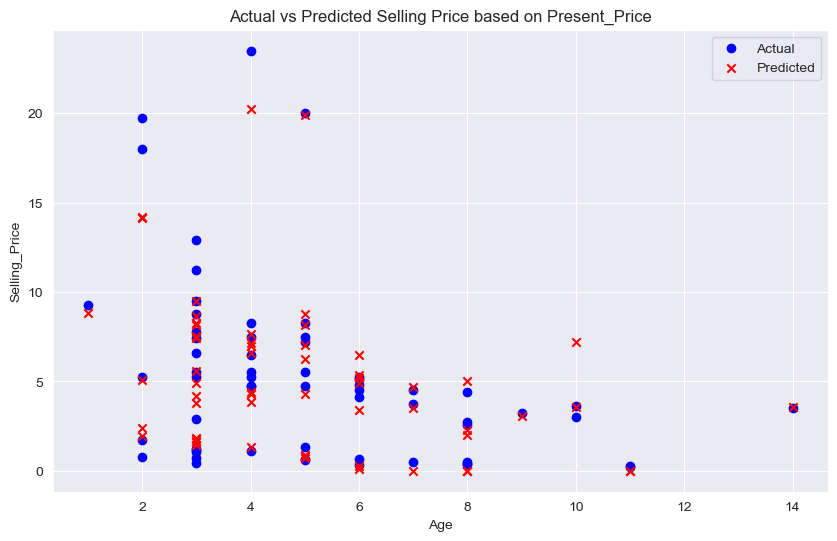

In [796]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Age'], y_test, label='Actual', color='blue')
plt.scatter(X_test['Age'], y_pred, label='Predicted', color='red', marker='x')
plt.xlabel('Age')
plt.ylabel('Selling_Price')
plt.title('Actual vs Predicted Selling Price based on Present_Price')
plt.legend()
plt.grid(True)
plt.show()

In [797]:
def residuals(model, X_test, y_test):
    '''
    Creates predictions on the features with the model and calculates residuals
    '''
    y_pred = model.predict(X_test)
    y_test = y_test.ravel()      # or: y_test = np.ravel(y_test)
    y_pred = y_pred.ravel()      # or: y_pred = np.ravel(y_pred)
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [798]:
def linear_assumption(model, X_test, y_test):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model
    '''
    df_results = residuals(model, X_test, y_test)
    
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    sns.regplot(x='Predicted', y='Actual', data=df_results, lowess=True, ax=ax[0],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[0].set_title('Actual vs. Predicted Values', fontsize=15)
    ax[0].set_xlabel('Predicted', fontsize=12)
    ax[0].set_ylabel('Actual', fontsize=12)        
    
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True, ax=ax[1],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=15)
    ax[1].set_xlabel('Predicted', fontsize=12)
    ax[1].set_ylabel('Residuals', fontsize=12)


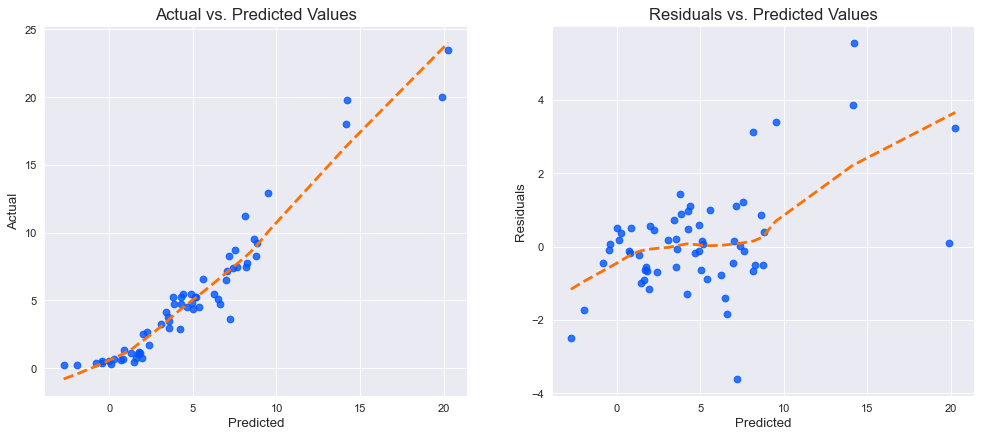

In [799]:
linear_assumption(model, X_test_scaled, y_test)

first chart:
Comparison of Actual and Predicted Values
Most of the points are close to the red line, especially in the lower price ranges (between 0 and 10), which shows that the model performs well in this range.
• As the actual price increases, the model has larger errors (the points become more scattered), i.e.:
The model performs worse in predicting more expensive cars.
Second chart:

“Actual vs Predicted Selling Price based on Present_Price” In the low price range (between 0 and 10 million or thousand?), the model works quite well and the predictions are close to the actual value

The inspection of the plots shows that the linearity assumption is not satisfied.
linkcode
Potential solutions:
 • Applying nonlinear transformations
 • Adding polynomial terms to some of the predictors

In [800]:
from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import anderson
import scipy.stats as stats



def normal_errors_assumption(model, X_test, y_test, p_value_thresh=0.05):
    '''
    Function for inspecting the assumption of normality of residuals.
    '''
    df_results = residuals(model, X_test, y_test)
    
    # Anderson-Darling Test
    p_value = normal_ad(df_results['Residuals'])[1]
    
    print('\nP-value from the test (below 0.05 generally means non-normal):  ', np.round(p_value,6))
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed. Assumption not satisfied.') 
    else:
        print('Residuals are normally distributed. Assumption satisfied.')

      
    # Residuals Histogram
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    
    sns.histplot(data=df_results, x='Residuals', kde=True, ax=ax[0], bins=15, 
                 color='#0055ff', edgecolor='none', alpha=0.4, line_kws={'lw': 2.5})
    ax[0].set_xlabel('Residuals', fontsize=12)
    ax[0].set_ylabel('Count', fontsize=12)
    ax[0].set_title('Distribution of Residuals', fontsize=15)
    textstr = '\n'.join((
        r'$\mu=%.2f$' %np.mean(df_results['Residuals']),
        r'$\sigma=%.2f$' %np.std(df_results['Residuals']),
        ))
    ax[0].text(0.7, 0.9, textstr, transform=ax[0].transAxes, fontsize=15, verticalalignment='top',
                 bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))
    
    
    # Q-Q Probability Plot
    stats.probplot(df_results['Residuals'], dist="norm", plot= ax[1])
    ax[1].set_title("Residuals Q-Q Plot", fontsize=15)
    ax[1].set_xlabel('Theoretical Quantiles', fontsize=12)
    ax[1].set_ylabel('Ordered Values', fontsize=12)
    ax[1].get_lines()[0].set_markerfacecolor('#509aff')
    ax[1].get_lines()[1].set_color('#ff7000')
    ax[1].get_lines()[1].set_linewidth(2.5)
    ax[1].get_lines()[1].set_linestyle('--')
    ax[1].legend(['Actual','Theoretical'])
    
    plt.show()




P-value from the test (below 0.05 generally means non-normal):   9e-06
Residuals are not normally distributed. Assumption not satisfied.


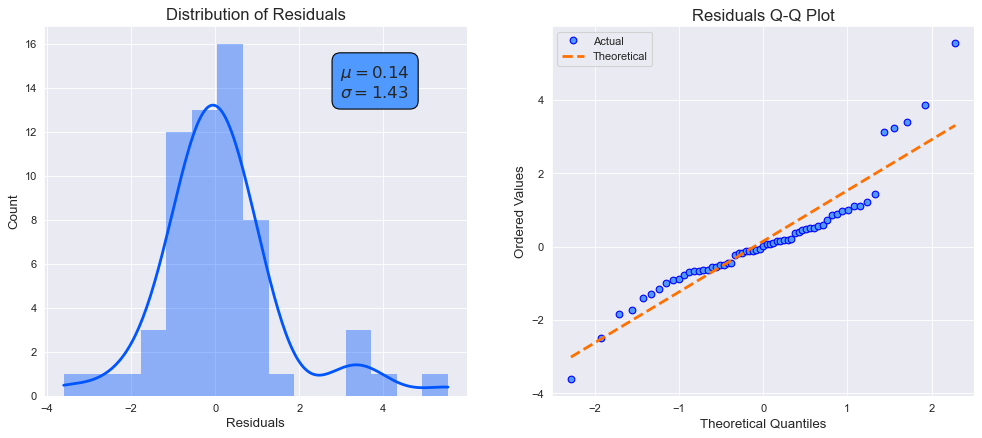

In [801]:
normal_errors_assumption(model, X_test_scaled, y_test)

It checks the assumption of normality of residuals in linear regression


In QQ Plot of residuals:
 • The bow-shaped pattern of deviations from the diagonal implies that the residuals have excessive skewness.
 • The s-shaped pattern of deviations from the diagonal implies excessive kurtosis of the residuals (there are either too many or too few large errors in both directions.)

The non-zero mean value and the positive skewness of the residual distribution and the s-shaped pattern of the deviations in the QQ plot show that the residuals do not follow the Gaussian distribution.
Potential solutions:
 • Nonlinear transformation of target variable and features
 • Removing potential outliers

It checks whether the residuals of the regression model (i.e. the difference between the actual and predicted values) follow a normal distribution.

Why is it important?

Because one of the main assumptions of linear regression is that the residuals must be normal for the statistical analysis (i.e., the confidence in the results) to be valid.

If p-value < 0.05 → residuals are not normal ❌
• If p-value >= 0.05 → residuals are normal ✅
This graph compares the residuals to the theoretical normal values.
• If the points are almost on the orange line → they are normal ✅
• If they form an S-shape or arc → they are not normal ❌


In [802]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [803]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

def multicollinearity_assumption(X):
    '''
    This checks that predictors are not highly correlated (no multicollinearity).
    Calculates VIF values for each feature.
    '''
    # Ensure all features are numeric
    X = X.select_dtypes(include=[np.number])
    
    # Remove NaNs or infinite values
    X = X.replace([np.inf, -np.inf], np.nan).dropna()
    
    # VIF calculation
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Count cases
    possible_multicollinearity = sum([1 for v in vif if v > 10])
    definite_multicollinearity = sum([1 for v in vif if v > 100])
    
    print(f'{possible_multicollinearity} cases of possible multicollinearity.')
    print(f'{definite_multicollinearity} cases of definite multicollinearity.')
    
    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('✅ Assumption satisfied.')
        else:
            print('⚠️ Assumption possibly satisfied.')
    else:
        print('❌ Assumption not satisfied.')
    
    return pd.DataFrame({'VIF': vif}, index=X.columns).round(2)

In [804]:
multicollinearity_assumption(X)

3 cases of possible multicollinearity.
0 cases of definite multicollinearity.
⚠️ Assumption possibly satisfied.


,VIF
Age,6.16
Present_Price,3.16
Kms_Driven,2.80
Fuel_Type,22.18
Seller_Type,25.34
Transmission,33.44
Owner,1.08


In [805]:
y_pred

array([[7.15109403e+00],
       [0.00000000e+00],
       [4.29317385e+00],
       [8.65452674e+00],
       [1.41567775e+01],
       [4.90831522e+00],
       [3.53467957e+00],
       [1.44629982e+00],
       [5.38203747e+00],
       [4.66822329e+00],
       [2.25436652e+00],
       [1.62369073e+00],
       [5.10340136e+00],
       [7.63583986e+00],
       [8.25142614e+00],
       [1.42107233e+01],
       [7.39937849e+00],
       [4.27934188e+00],
       [0.00000000e+00],
       [2.39120792e+00],
       [5.03077854e+00],
       [3.81276384e+00],
       [6.49858604e+00],
       [8.14607684e+00],
       [0.00000000e+00],
       [1.94357130e+00],
       [0.00000000e+00],
       [8.21481213e-01],
       [2.20224230e-03],
       [7.20531002e+00],
       [3.07786554e+00],
       [7.05021502e+00],
       [7.21562252e-01],
       [7.54652493e+00],
       [3.56884281e+00],
       [1.81884781e+00],
       [5.60660404e+00],
       [6.59162587e+00],
       [0.00000000e+00],
       [8.75806929e+00],


Multicollinearity occurs when the independent variables are correlated to each other. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison. The coefficient estimates can swing wildly based on which other independent variables are in the model and they become very sensitive to small changes in the model. Therefore, the estimates will be less precise and highly sensitive to particular sets of data. This increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant. On the other hand, the simultaneous changes of the independent variables can lead to large fluctuations of the target variable, which leads to the overfitting of the model and the reduction of its performance

Interpretation of VIF: The square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. The higher the value of VIF the higher correlation between this variable and the rest. A rule of thumb is that if VIF > 10 then multicollinearity is high

In [806]:
def compare_scatter_plot(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
    
   #draw line: y = x
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_pred.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction (y = x)')
    
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Scatter Plot: Predicted vs. Actual")
    plt.legend()
    plt.grid(True)
    plt.show()

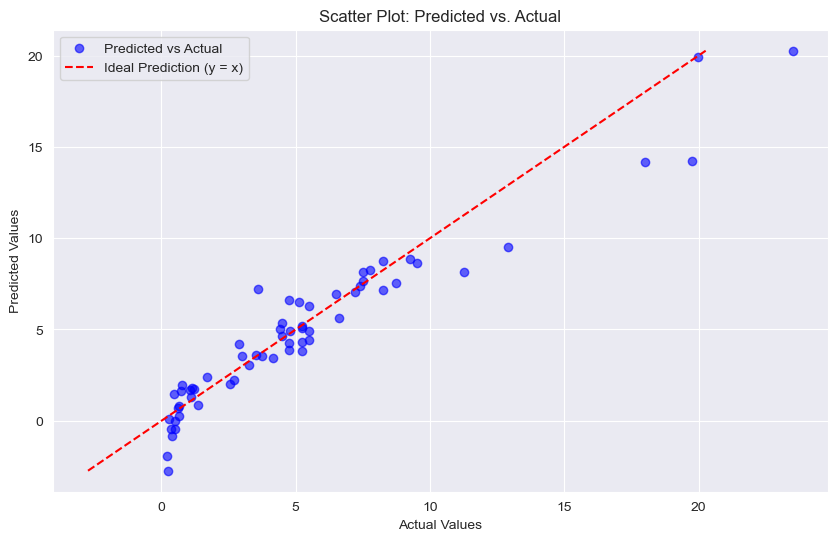

In [807]:
compare_scatter_plot(y_test, model.predict(X_test_scaled))

In [808]:


def compare_bar_plot(y_test, y_pred, num_bars=20):
    df1 = pd.DataFrame({
        'Actual': y_test.flatten(), 
        'Predicted': y_pred.flatten()
    })

 
    df1 = df1.head(num_bars)
    df1.reset_index(drop=True, inplace=True)

    df1.plot(kind='bar', figsize=(15, 6), width=0.7)
    plt.title('Comparison: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index')
    plt.ylabel('Target Value')
    plt.xticks(rotation=0)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


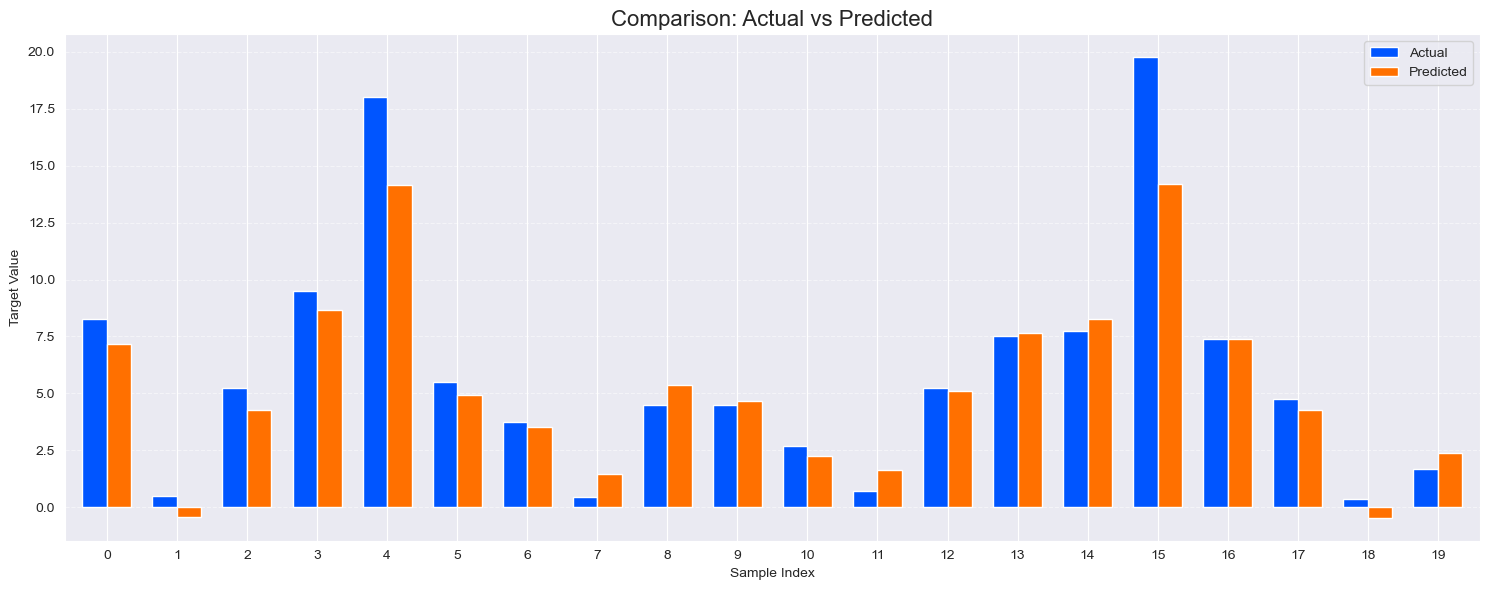

In [809]:
compare_bar_plot(y_test, model.predict(X_test_scaled))

he difference between the corresponding bars in the above bar plot shows the prediction error of the model on the test data. Also, out of 90 test samples, Selling_Price has been predicted negatively in 6 cases. A negative prediction for Selling_Price is disappointing.

In [810]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np

def auto_polynomial_and_log_feature_search(X, y, base_r2=0.91, max_power=5, test_size=0.2, random_state=0, verbose=True):
    X = X.copy()
    
    
    numerical_cols = [col for col in X.columns if np.issubdtype(X[col].dtype, np.number)]
    
    best_r2 = base_r2
    added_features = []

    improved = True
    while improved:
        improved = False
        for col in numerical_cols:
            col_data = X[col]
            
            # بررسی log
            if (col_data > 0).all():
                log_col = f'log_{col}'
                if log_col not in X.columns:
                    X[log_col] = np.log(col_data)
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
                    model = LinearRegression()
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    r2 = metrics.r2_score(y_test, y_pred)

                    if r2 > best_r2:
                        best_r2 = r2
                        improved = True
                        added_features.append(log_col)
                        if verbose:
                            print(f"✅ Added: {log_col} | New R2: {round(r2, 4)}")
                    else:
                        X.drop(columns=[log_col], inplace=True)

            # checking power
            for power in range(2, max_power + 1):
                power_col = f'{col}^{power}'
                if power_col in X.columns:
                    continue

                X[power_col] = col_data ** power
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
                model = LinearRegression()
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                r2 = metrics.r2_score(y_test, y_pred)

                if r2 > best_r2:
                    best_r2 = r2
                    improved = True
                    added_features.append(power_col)
                    if verbose:
                        print(f"✅ Added: {power_col} | New R2: {round(r2, 4)}")
                else:
                    X.drop(columns=[power_col], inplace=True)

        if not improved and verbose:
            print("🚫 No further improvement. Finished.")

    return X, best_r2, added_features

In [811]:


X_transformed, final_r2, best_features = auto_polynomial_and_log_feature_search(X, y)

print("\n🎯 Final R² Score:", round(final_r2, 4))
print("📌 Final Selected Features:", best_features)

✅ Added: log_Age | New R2: 0.916
✅ Added: Present_Price^2 | New R2: 0.921
✅ Added: Kms_Driven^2 | New R2: 0.9269
✅ Added: Owner^2 | New R2: 0.9299
✅ Added: log_Present_Price | New R2: 0.9309
✅ Added: log_Kms_Driven | New R2: 0.9378
✅ Added: log_Transmission | New R2: 0.9378
✅ Added: Transmission^2 | New R2: 0.9378
✅ Added: Transmission^3 | New R2: 0.9378
✅ Added: Transmission^5 | New R2: 0.9378
✅ Added: Seller_Type^4 | New R2: 0.9378
🚫 No further improvement. Finished.

🎯 Final R² Score: 0.9378
📌 Final Selected Features: ['log_Age', 'Present_Price^2', 'Kms_Driven^2', 'Owner^2', 'log_Present_Price', 'log_Kms_Driven', 'log_Transmission', 'Transmission^2', 'Transmission^3', 'Transmission^5', 'Seller_Type^4']


In [812]:
X_transformed

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,log_Age,Present_Price^2,Kms_Driven^2,Owner^2,log_Present_Price,log_Kms_Driven,log_Transmission,Transmission^2,Transmission^3,Transmission^5,Seller_Type^4
0,5,5.59,27000,2,2,2,0,1.609438,31.2481,729000000,0,1.720979,10.203592,0.693147,4,8,32,16
1,6,9.54,43000,3,2,2,0,1.791759,91.0116,1849000000,0,2.255493,10.668955,0.693147,4,8,32,16
2,2,9.85,6900,2,2,2,0,0.693147,97.0225,47610000,0,2.287471,8.839277,0.693147,4,8,32,16
3,8,4.15,5200,2,2,2,0,2.079442,17.2225,27040000,0,1.423108,8.556414,0.693147,4,8,32,16
4,5,6.87,42450,3,2,2,0,1.609438,47.1969,1802002500,0,1.927164,10.656082,0.693147,4,8,32,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,3,11.60,33988,3,2,2,0,1.098612,134.5600,1155184144,0,2.451005,10.433763,0.693147,4,8,32,16
297,4,5.90,60000,2,2,2,0,1.386294,34.8100,3600000000,0,1.774952,11.002100,0.693147,4,8,32,16
298,10,11.00,87934,2,2,2,0,2.302585,121.0000,7732388356,0,2.397895,11.384342,0.693147,4,8,32,16
299,2,12.50,9000,3,2,2,0,0.693147,156.2500,81000000,0,2.525729,9.104980,0.693147,4,8,32,16


This code automatically tests which powers or logs of the numerical features improve the model accuracy (R²), and only keeps those

In [813]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import pandas as pd

def auto_interaction_feature_selection(X_transformed, y, base_r2=0.93, test_size=0.2, random_state=0):
    X = X_transformed.copy()
    kept_features = []
    best_r2 = base_r2

    numerical_cols = [col for col in X.columns if np.issubdtype(X[col].dtype, np.number)]

    for i in range(len(numerical_cols)):
        for j in range(i, len(numerical_cols)):
            f1, f2 = numerical_cols[i], numerical_cols[j]
            new_col = f'{f1}*{f2}'
            X[new_col] = X[f1] * X[f2]

            # مدلسازی
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            r2 = metrics.r2_score(y_test, y_pred)

            if r2 > best_r2:
                best_r2 = r2
                kept_features.append(new_col)
                print(f"✅ Kept: {new_col} | R² improved to: {round(r2, 4)}")
            else:
                X.drop(columns=[new_col], inplace=True)
                print(f"❌ Dropped: {new_col} | R² did not improve")

    print("\n🎯 Final R² Score:", round(best_r2, 4))
    print("✅ Selected Interaction Features:", kept_features)

    return X, kept_features, best_r2

In [814]:
X_interacted, kept_interactions, final_r2 = auto_interaction_feature_selection(X_transformed, y)

✅ Kept: Age*Age | R² improved to: 0.936
✅ Kept: Age*Present_Price | R² improved to: 0.9735
❌ Dropped: Age*Kms_Driven | R² did not improve
❌ Dropped: Age*Fuel_Type | R² did not improve
❌ Dropped: Age*Seller_Type | R² did not improve
✅ Kept: Age*Transmission | R² improved to: 0.9743
❌ Dropped: Age*Owner | R² did not improve
✅ Kept: Age*log_Age | R² improved to: 0.9747
❌ Dropped: Age*Present_Price^2 | R² did not improve
❌ Dropped: Age*Kms_Driven^2 | R² did not improve
❌ Dropped: Age*Owner^2 | R² did not improve
❌ Dropped: Age*log_Present_Price | R² did not improve
❌ Dropped: Age*log_Kms_Driven | R² did not improve
✅ Kept: Age*log_Transmission | R² improved to: 0.9747
❌ Dropped: Age*Transmission^2 | R² did not improve
✅ Kept: Age*Transmission^3 | R² improved to: 0.9747
❌ Dropped: Age*Transmission^5 | R² did not improve
❌ Dropped: Age*Seller_Type^4 | R² did not improve
✅ Kept: Present_Price*Present_Price | R² improved to: 0.9747
❌ Dropped: Present_Price*Kms_Driven | R² did not improve
❌ Dro

This automated code continuously tests the interaction terms and logarithmic features, and ultimately keeps only those that improve the model's R^2. This way, you have a final feature set that significantly improves the model's accuracy

In [815]:
X_interacted.columns

Index(['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'log_Age', 'Present_Price^2', 'Kms_Driven^2',
       'Owner^2', 'log_Present_Price', 'log_Kms_Driven', 'log_Transmission',
       'Transmission^2', 'Transmission^3', 'Transmission^5', 'Seller_Type^4',
       'Age*Age', 'Age*Present_Price', 'Age*Transmission', 'Age*log_Age',
       'Age*log_Transmission', 'Age*Transmission^3',
       'Present_Price*Present_Price', 'Present_Price*Seller_Type',
       'Present_Price*Owner', 'Present_Price*log_Age',
       'Present_Price*log_Kms_Driven', 'Kms_Driven*Seller_Type',
       'Fuel_Type*log_Age', 'Fuel_Type*Owner^2', 'Fuel_Type*log_Kms_Driven',
       'Seller_Type*log_Kms_Driven', 'Transmission*log_Age',
       'Transmission*log_Kms_Driven', 'Transmission*log_Transmission',
       'Owner*Owner', 'Owner*log_Age', 'log_Age*Transmission^2',
       'log_Age*Seller_Type^4', 'Present_Price^2*Present_Price^2',
       'Present_Price^2*log_Kms_Driven'

In [816]:

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np

# فرض: X_interacted و y از قبل آماده هستن
X_final = X_interacted.copy()
y_final = pd.Series(y.squeeze())  # اگر y شما DataFrame باشه

kf = KFold(n_splits=5, shuffle=True, random_state=42)
bad_indices = []
fold_number = 1

print("📊 Checking each fold's R²...")

for train_index, test_index in kf.split(X_final):
    X_train, X_test = X_final.iloc[train_index], X_final.iloc[test_index]
    y_train, y_test = y_final.iloc[train_index], y_final.iloc[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = metrics.r2_score(y_test, y_pred)

    print(f"🔁 Fold {fold_number} → R² = {round(r2, 4)}")
    
    if r2 < 0:
        print(f"❌ Fold {fold_number} has bad R². Removing {len(test_index)} samples...")
        bad_indices.extend(test_index)
    else:
        print(f"✅ Fold {fold_number} is OK.")
    
    fold_number += 1

# حذف داده‌های مربوط به فولدهای بد
X_cleaned = X_final.drop(index=bad_indices).reset_index(drop=True)
y_cleaned = y_final.drop(index=bad_indices).reset_index(drop=True)

# چاپ خلاصه وضعیت
print("\n📌 Summary:")
print(f"🗂️ Original data shape: {X_final.shape}")
print(f"🧹 Cleaned data shape : {X_cleaned.shape}")
print(f"🗑️ Total samples removed: {len(bad_indices)}")

# بررسی مدل بعد از حذف
model = LinearRegression()
model.fit(X_cleaned, y_cleaned)
y_pred = model.predict(X_cleaned)
r2_new = metrics.r2_score(y_cleaned, y_pred)

print(f"\n🎯 New R² after cleaning: {round(r2_new, 4)}")


📊 Checking each fold's R²...
🔁 Fold 1 → R² = 0.9662
✅ Fold 1 is OK.
🔁 Fold 2 → R² = -8.8027
❌ Fold 2 has bad R². Removing 60 samples...
🔁 Fold 3 → R² = 0.9509
✅ Fold 3 is OK.
🔁 Fold 4 → R² = 0.9655
✅ Fold 4 is OK.
🔁 Fold 5 → R² = 0.8042
✅ Fold 5 is OK.

📌 Summary:
🗂️ Original data shape: (301, 45)
🧹 Cleaned data shape : (241, 45)
🗑️ Total samples removed: 60

🎯 New R² after cleaning: 0.9782


C:\Users\abolfazl\AppData\Local\Temp\ipykernel_3420\723834444.py:19: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\abolfazl\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


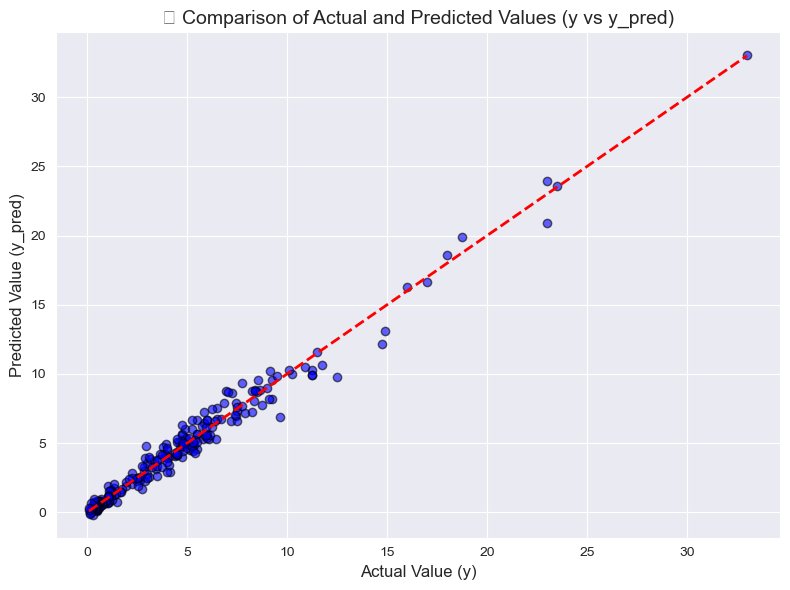

In [817]:
# Create a figure with specified size
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_cleaned, y_pred, color='blue', alpha=0.6, edgecolor='k')

# Plot a reference line (perfect prediction line)
plt.plot([y_cleaned.min(), y_cleaned.max()],
         [y_cleaned.min(), y_cleaned.max()],
         'r--', lw=2)

# Add title and axis labels
plt.title("📉 Comparison of Actual and Predicted Values (y vs y_pred)", fontsize=14)
plt.xlabel("Actual Value (y)", fontsize=12)
plt.ylabel("Predicted Value (y_pred)", fontsize=12)

# Show grid and apply layout adjustment
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

The graph shows exactly the comparison between the actual and final predicted y.
• The closer the points are to the red line, the better the model performed.
• Because you did X_final → X_cleaned and retrained the model, this graph is for the cleanest and most accurate version of your model

In [837]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_data = scaler.fit_transform(pd.concat([df[["Selling_Price"]], X_interacted], axis=1))
df_scaled = pd.DataFrame(scaled_data, columns=["Selling_Price"] + list(X_interacted.columns))


In [838]:
x=df_scaled.drop("Selling_Price",axis=1)
y=df_scaled["Selling_Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))


MAE: 11596964.6387371
MSE: 8203864899343744.0
RMSE: 90575189.20401847
R2 Score: -3.9531050171593606e+17


In [839]:
import pandas as pd
import numpy as np

# گرفتن ورودی از کاربر
Present_Price = float(input("Present_Price: "))	
Kms_Driven = float(input("Kms_Driven: "))	
Fuel_Type = float(input("Fuel_Type: "))	
Seller_Type = float(input("Seller_Type: "))	
Transmission = float(input("Transmission: "))	
Owner = float(input("Owner: "))	
Age = float(input("Age: "))

# محاسبه ویژگی‌های پیشرفته
log_Age = np.log1p(Age)
log_Present_Price = np.log1p(Present_Price)
log_Kms_Driven = np.log1p(Kms_Driven)
log_Transmission = np.log1p(Transmission)

# ساخت دیتافریم با ویژگی‌ها
inpt = pd.DataFrame({
    "Age": [Age],
    "Present_Price": [Present_Price],
    "Kms_Driven": [Kms_Driven],
    "Fuel_Type": [Fuel_Type],
    "Seller_Type": [Seller_Type],
    "Transmission": [Transmission],
    "Owner": [Owner],
    
    "log_Age": [log_Age],
    "Present_Price^2": [Present_Price**2],
    "Kms_Driven^2": [Kms_Driven**2],
    "Owner^2": [Owner**2],
    "log_Present_Price": [log_Present_Price],
    "log_Kms_Driven": [log_Kms_Driven],
    "log_Transmission": [log_Transmission],
    "Transmission^2": [Transmission**2],
    "Transmission^3": [Transmission**3],
    "Transmission^5": [Transmission**5],
    "Seller_Type^4": [Seller_Type**4],
    
    "Age*Age": [Age*Age],
    "Age*Present_Price": [Age*Present_Price],
    "Age*Transmission": [Age*Transmission],
    "Age*log_Age": [Age*log_Age],
    "Age*log_Transmission": [Age*log_Transmission],
    "Age*Transmission^3": [Age*(Transmission**3)],
    
    "Present_Price*Present_Price": [Present_Price*Present_Price],
    "Present_Price*Seller_Type": [Present_Price*Seller_Type],
    "Present_Price*Owner": [Present_Price*Owner],
    "Present_Price*log_Age": [Present_Price*log_Age],
    "Present_Price*log_Kms_Driven": [Present_Price*log_Kms_Driven],
    
    "Kms_Driven*Seller_Type": [Kms_Driven*Seller_Type],
    
    "Fuel_Type*log_Age": [Fuel_Type*log_Age],
    "Fuel_Type*Owner^2": [Fuel_Type*(Owner**2)],
    "Fuel_Type*log_Kms_Driven": [Fuel_Type*log_Kms_Driven],
    
    "Seller_Type*log_Kms_Driven": [Seller_Type*log_Kms_Driven],
    
    "Transmission*log_Age": [Transmission*log_Age],
    "Transmission*log_Kms_Driven": [Transmission*log_Kms_Driven],
    "Transmission*log_Transmission": [Transmission*log_Transmission],
    
    "Owner*Owner": [Owner*Owner],
    "Owner*log_Age": [Owner*log_Age],
    
    "log_Age*Transmission^2": [log_Age*(Transmission**2)],
    "log_Age*Seller_Type^4": [log_Age*(Seller_Type**4)],
    
    "Present_Price^2*Present_Price^2": [(Present_Price**2)**2],
    "Present_Price^2*log_Kms_Driven": [(Present_Price**2)*log_Kms_Driven],
    
    "log_Kms_Driven*log_Transmission": [log_Kms_Driven*log_Transmission],
    "log_Kms_Driven*Transmission^2": [log_Kms_Driven*(Transmission**2)]
})




In [840]:
now = pd.concat([df_scaled, inpt], ignore_index=True)

In [841]:
x=now.drop("Selling_Price",axis=1)[:301]
y=now["Selling_Price"][:301]
x_final=now.drop("Selling_Price",axis=1)[301:]
model.fit(x,y)
y_pred=model.predict(x_final)
y_pred

array([6.35567069e+09])